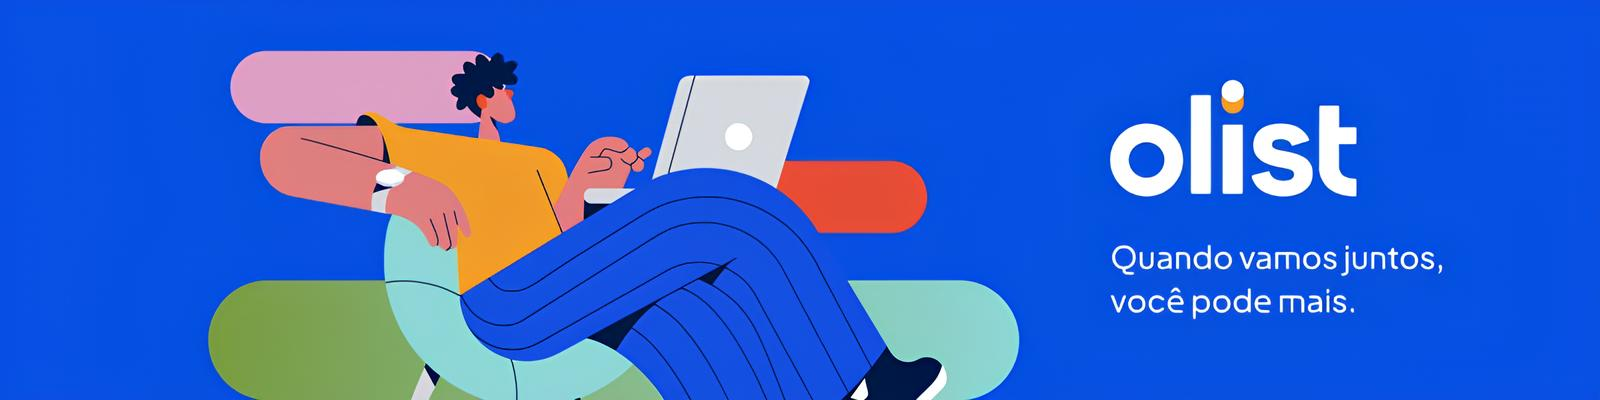

<div style="
     background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    color: #6a5d50;
    position: relative;
    border-radius: 20px 20px 40px 40px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4);
    font-family: 'Poppins', sans-serif;
    filter: brightness(1.08);
    overflow: hidden;">    
    <h3 style="font-size: 24px; font-weight: 600; margin: 0 0 10px 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        🚀 Project Kickoff — “From Click to Delivery: What Really Happens?”
    </h3>    
    <p style="font-size: 18px; font-weight: 400; margin: 0;">
        This research dives deep into the full customer journey in Brazilian e-commerce — from browsing to final review.<br><br>
        We’re not here to just count sales. We’re here to <b>spot what works, what’s broken, and what’s holding us back</b>. 
        By combining business metrics, product insights, and behavioral patterns, we aim to answer one thing: 
        <i>How can we sell more, deliver better, and make customers stay?</i>
        <br><br>
        Here’s our roadmap:
    </p>    
    <ul style="padding-left: 20px; margin-top: 5px; margin-bottom: 5px; font-size: 17px;">
        <li><b>EDA Phase:</b> Understand customer behavior, reviews, delays, categories</li>
        <li><b>Metric Analysis:</b> Core KPIs, customer value, retention, efficiency</li>
        <li><b>A/B Testing:</b> Validate real impact of delays, payment type, basket size</li>
        <li><b>Growth Ideas:</b> Targeted, data-backed, and ready to test</li>
    </ul>    
    <p style="font-size: 18px; font-weight: 400; margin: 0;">
        Let’s replace assumptions with numbers. And guesswork — with insight.
    </p>
</div>


# <span style="color:transparent;">1. Data Loading and Initial Exploration</span>

<div style="
     background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); 
    padding: 35px;
    text-align: center;
    color: #6a5d50; 
    position: relative;
    border-radius: 50px 50px 20px 20px;
    box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.2), inset 0px 2px 10px rgba(255, 255, 255, 0.4);
    font-family: 'Poppins', sans-serif;
    filter: brightness(1.05);
    overflow: hidden;">
    <h1 style="font-size: 36px; font-weight: 700; margin: 0;
        text-shadow: 1px 1px 4px rgba(0, 0, 0, 0.1);">
        1. Data Loading and Initial Exploration
    </h1>
</div>


In [1]:
!pip install -q scikit-posthocs
!pip install -q plotly
import plotly.io as pio
pio.renderers.default = 'iframe_connected'


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

from folium.plugins import MarkerCluster
import folium

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import kruskal
import scikit_posthocs as sp

sns.set_style('whitegrid')

In [2]:
orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
order_items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
payments = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv")
reviews = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")
sellers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv")
products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
geolocation = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv")
categories = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")

dfs = {
    "orders": orders,
    "order_items": order_items,
    "payments": payments,
    "reviews": reviews,
    "customers": customers,
    "sellers": sellers,
    "products": products,
    "geolocation": geolocation,
    "categories": categories
}

for name, df in dfs.items():
    print(f"\n\n  ---  for table «{name.upper()}» shape is {df.shape}  ---\n")
    print(f"First 2 rows:\n{df.head(2)}\n")
    print(f"Column Names:\n{df.columns.tolist()}\n")
    print(f"Data Types:\n{df.dtypes}")




  ---  for table «ORDERS» shape is (99441, 8)  ---

First 2 rows:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  

Column Names:
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Data Types:
order

In [3]:
for name, df in dfs.items():
    print(f"\n{name.upper()} - NULL values:")
    print(df.isnull().sum(),'\n')


ORDERS - NULL values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 


ORDER_ITEMS - NULL values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 


PAYMENTS - NULL values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64 


REVIEWS - NULL values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 



In [4]:
for name, df in dfs.items():
    print(f"\n{name.upper()} - Duplicates: {df.duplicated().sum()}")


ORDERS - Duplicates: 0

ORDER_ITEMS - Duplicates: 0

PAYMENTS - Duplicates: 0

REVIEWS - Duplicates: 0

CUSTOMERS - Duplicates: 0

SELLERS - Duplicates: 0

PRODUCTS - Duplicates: 0

GEOLOCATION - Duplicates: 261831

CATEGORIES - Duplicates: 0


In [5]:
geolocation.duplicated(subset=['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']).value_counts()

False    738332
True     261831
Name: count, dtype: int64

In [6]:
geolocation = geolocation.drop_duplicates()
geolocation.duplicated().sum()

0

---

### Handling Duplicates in the `GEOLOCATION` Table

1. **Identified duplicates:**  
   Found 261,831 duplicate rows based on key geographical columns: `geolocation_zip_code_prefix`, `geolocation_lat`, `geolocation_lng`, `geolocation_city`, and `geolocation_state`.

2. **Why remove duplicates:**  
   The duplicates represent repeated identical entries with no additional information or variation. These do not provide value for analysis and could distort results, especially in aggregating regional data.

3. **Action:**  
   Removed duplicates to streamline the dataset and ensure only unique geographical entries are retained.

This cleaning step ensures the dataset is more manageable and reflects accurate geographical data without redundant entries.

---

# <span style="color:transparent;">2. Handling Missing Data</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); 
    padding: 35px;
    text-align: center;
    color: #6a5d50; 
    position: relative;
    border-radius: 50px 50px 20px 20px;
    box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.2), inset 0px 2px 10px rgba(255, 255, 255, 0.4);
    font-family: 'Poppins', sans-serif;
    filter: brightness(1.05);
    overflow: hidden;">
    <h1 style="font-size: 36px; font-weight: 700; margin: 0;
        text-shadow: 1px 1px 4px rgba(0, 0, 0, 0.1);">
        2. Handling Missing Data
    </h1>
</div>

In [7]:
reviews = reviews.drop('review_comment_title', axis=1)

products = products.drop(['product_name_lenght', 'product_description_lenght', 'product_photos_qty'], axis=1)
products['product_category_name'] = products['product_category_name'].fillna('unknown')
products['product_weight_g'] = products['product_weight_g'].fillna(products['product_weight_g'].median())
products['product_length_cm'] = products['product_length_cm'].fillna(products['product_length_cm'].median())
products['product_height_cm'] = products['product_height_cm'].fillna(products['product_height_cm'].median())
products['product_width_cm'] = products['product_width_cm'].fillna(products['product_width_cm'].median())

In [8]:
mask = (orders['order_approved_at'].isnull()) & (orders['order_status']=='canceled')
orders[mask].head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00


In [9]:
orders[orders["order_approved_at"].isnull()]["order_status"].value_counts()

order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

In [10]:
orders[orders["order_approved_at"].isnull() & (orders["order_status"] == "delivered")]["order_id"].values

array(['e04abd8149ef81b95221e88f6ed9ab6a',
       '8a9adc69528e1001fc68dd0aaebbb54a',
       '7013bcfc1c97fe719a7b5e05e61c12db',
       '5cf925b116421afa85ee25e99b4c34fb',
       '12a95a3c06dbaec84bcfb0e2da5d228a',
       'c1d4211b3dae76144deccd6c74144a88',
       'd69e5d356402adc8cf17e08b5033acfb',
       'd77031d6a3c8a52f019764e68f211c69',
       '7002a78c79c519ac54022d4f8a65e6e8',
       '2eecb0d85f281280f79fa00f9cec1a95',
       '51eb2eebd5d76a24625b31c33dd41449',
       '88083e8f64d95b932164187484d90212',
       '3c0b8706b065f9919d0505d3b3343881',
       '2babbb4b15e6d2dfe95e2de765c97bce'], dtype=object)

In [11]:
payments[payments["order_id"].isin(['e04abd8149ef81b95221e88f6ed9ab6a',
       '8a9adc69528e1001fc68dd0aaebbb54a',
       '7013bcfc1c97fe719a7b5e05e61c12db',
       '5cf925b116421afa85ee25e99b4c34fb',
       '12a95a3c06dbaec84bcfb0e2da5d228a',
       'c1d4211b3dae76144deccd6c74144a88',
       'd69e5d356402adc8cf17e08b5033acfb',
       'd77031d6a3c8a52f019764e68f211c69',
       '7002a78c79c519ac54022d4f8a65e6e8',
       '2eecb0d85f281280f79fa00f9cec1a95',
       '51eb2eebd5d76a24625b31c33dd41449',
       '88083e8f64d95b932164187484d90212',
       '3c0b8706b065f9919d0505d3b3343881',
       '2babbb4b15e6d2dfe95e2de765c97bce'])]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1430,e04abd8149ef81b95221e88f6ed9ab6a,1,boleto,1,349.01
28903,c1d4211b3dae76144deccd6c74144a88,1,boleto,1,54.51
39345,5cf925b116421afa85ee25e99b4c34fb,1,boleto,1,106.81
39368,51eb2eebd5d76a24625b31c33dd41449,1,boleto,1,77.06
40373,12a95a3c06dbaec84bcfb0e2da5d228a,1,boleto,1,95.76
41416,3c0b8706b065f9919d0505d3b3343881,1,boleto,1,157.19
44659,2eecb0d85f281280f79fa00f9cec1a95,1,boleto,1,154.23
44706,88083e8f64d95b932164187484d90212,1,boleto,1,127.04
60305,2babbb4b15e6d2dfe95e2de765c97bce,1,boleto,1,106.81
64205,7013bcfc1c97fe719a7b5e05e61c12db,1,boleto,1,65.52


In [12]:
orders.loc[orders['order_approved_at'].isnull() & (orders['order_status'] == 'delivered'), 'order_approved_at'] = orders['order_purchase_timestamp']


In [13]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
orders[orders["order_delivered_carrier_date"].isnull()]["order_status"].value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [15]:
orders[orders["order_delivered_customer_date"].isnull()]["order_status"].value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [16]:
orders[(orders["order_delivered_customer_date"].isnull()) & (orders["order_status"] == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaN,2018-07-30 00:00:00
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaN,2018-07-24 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaN,2018-06-26 00:00:00
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaN,2018-07-19 00:00:00


In [17]:
orders[(orders["order_delivered_carrier_date"].isnull()) & (orders["order_status"] == "delivered")]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaN,NaN,2017-06-23 00:00:00


In [18]:
orders = orders[~orders["order_id"].isin(["2d858f451373b04fb5c984a1cc2defaf", "2aa91108853cecb43c84a5dc5b277475"])].copy()
orders["order_delivered_customer_date"] = orders["order_delivered_customer_date"].fillna(orders["order_estimated_delivery_date"])
orders['order_approved_at'] = orders['order_approved_at'].fillna(orders['order_purchase_timestamp'])

<div style=" background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); padding: 25px; color: #6a5d50; position: relative; border-radius: 20px 20px 40px 40px; box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4); filter: brightness(1.08); overflow: hidden;"> <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);"> Handling Missing Values in the `orders` Dataset (Summary) </h3> <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;"> 1️⃣ <b>Removed problematic orders:</b><br> - Order `2d858f451373b04fb5c984a1cc2defaf` had no delivery dates, making it unreliable.<br> - Order `2aa91108853cecb43c84a5dc5b277475` had an invalid `"delivered"` status without a recorded shipment.<br><br>
    2️⃣ <b>Imputed `order_delivered_customer_date`:</b><br>  
    - Missing values were filled with `order_estimated_delivery_date` to maintain consistency in delivery timelines.<br><br>
    3️⃣ <b>Imputed `order_approved_at`:</b><br>  
    - Missing values were filled with `order_purchase_timestamp` to prevent gaps in order processing time.<br><br>
    4️⃣ <b>Kept missing values in `order_delivered_carrier_date`:</b><br>  
    - Mostly found in `"canceled"` and `"unavailable"` orders, indicating no logistics involvement.<br>  
    - Present in `"invoiced"` and `"processing"` orders, meaning the orders are still in progress.<br><br>
    ✅ <b>Final result:</b> No missing values except for `order_delivered_carrier_date` (1781), which accurately reflects the real-world status of orders.
</p>
</div>

# <span style="color:transparent;">3. Data Merging & Integrity Checks</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); 
    padding: 35px;
    text-align: center;
    color: #6a5d50; 
    position: relative;
    border-radius: 50px 50px 20px 20px;
    box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.2), inset 0px 2px 10px rgba(255, 255, 255, 0.4);
    font-family: 'Poppins', sans-serif;
    filter: brightness(1.05);
    overflow: hidden;">
    <h1 style="font-size: 36px; font-weight: 700; margin: 0;
        text-shadow: 1px 1px 4px rgba(0, 0, 0, 0.1);">
        3. Data Merging & Integrity Checks
    </h1>
</div>


In [19]:
orders = orders.merge(customers[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 'customer_zip_code_prefix']], how='left', on='customer_id')

In [20]:
orders = orders.merge(order_items[['order_id', 'product_id', 'seller_id', 'price']], how='left', on='order_id')

orders = orders.merge(products[['product_id', 'product_category_name']], how='left', on='product_id')

orders = orders.merge(payments[['order_id', 'payment_type', 'payment_value', 'payment_installments']], how='left', on='order_id')

In [21]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     2072
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_city                       0
customer_state                      0
customer_zip_code_prefix            0
product_id                        830
seller_id                         830
price                             830
product_category_name             830
payment_type                        3
payment_value                       3
payment_installments                3
dtype: int64

In [22]:
orders[orders['payment_type'].isna()]['order_status'].value_counts()

order_status
delivered    3
Name: count, dtype: int64

In [23]:
orders[orders['payment_type'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,customer_zip_code_prefix,product_id,seller_id,price,product_category_name,payment_type,payment_value,payment_installments
36657,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,14600,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,beleza_saude,NaN,NaN,NaN
36658,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,14600,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,beleza_saude,NaN,NaN,NaN
36659,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,14600,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,beleza_saude,NaN,NaN,NaN


In [24]:
orders = orders.merge(reviews[['order_id', 'review_score', 'review_creation_date']], how='left', on='order_id')

orders = orders.merge(sellers[['seller_id', 'seller_city']], how='left', on='seller_id')

In [25]:
geo_avg = geolocation.groupby('geolocation_zip_code_prefix')[['geolocation_lat', 'geolocation_lng']].mean().reset_index()

orders = orders.merge(geo_avg, how='left', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')

orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     2084
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_city                       0
customer_state                      0
customer_zip_code_prefix            0
product_id                        833
seller_id                         833
price                             833
product_category_name             833
payment_type                        3
payment_value                       3
payment_installments                3
review_score                      997
review_creation_date              997
seller_city                       833
geolocation_zip_code_prefix       322
geolocation_lat                   322
geolocation_lng                   322
dtype: int64

In [26]:
orders.loc[orders['payment_type'].isna(), 'payment_type'] = 'not_defined'

> _“Although the dataset included an automatic English translation of category names (`product_category_name_english`), I chose to create a custom translated version for clarity and consistency in visualizations and summaries.”_

In [27]:
category_translation = {
    'utilidades_domesticas': 'home_utilities',
    'perfumaria': 'perfumery',
    'automotivo': 'automotive',
    'pet_shop': 'pet_shop',
    'papelaria': 'stationery',
    'unknown': 'unknown',
    'moveis_decoracao': 'furniture_decor',
    'moveis_escritorio': 'office_furniture',
    'ferramentas_jardim': 'tools_garden',
    'informatica_acessorios': 'computing_accessories',
    'cama_mesa_banho': 'bed_bath_table',
    'brinquedos': 'toys',
    'construcao_ferramentas_construcao': 'construction_tools_construction',
    'telefonia': 'telephony',
    'beleza_saude': 'beauty_health',
    'eletronicos': 'electronics',
    'bebes': 'baby',
    'cool_stuff': 'cool_stuff',
    'relogios_presentes': 'watches_gifts',
    'climatizacao': 'air_conditioning',
    'esporte_lazer': 'sports_leisure',
    'livros_interesse_geral': 'books_general_interest',
    'eletroportateis': 'small_appliances',
    'alimentos': 'food',
    'malas_acessorios': 'luggage_accessories',
    'fashion_underwear_e_moda_praia': 'fashion_underwear_beachwear',
    'artigos_de_natal': 'christmas_articles',
    'fashion_bolsas_e_acessorios': 'fashion_bags_accessories',
    'instrumentos_musicais': 'musical_instruments',
    'construcao_ferramentas_iluminacao': 'construction_tools_lighting',
    'livros_tecnicos': 'technical_books',
    'construcao_ferramentas_jardim': 'construction_tools_garden',
    'eletrodomesticos': 'home_appliances',
    'market_place': 'market_place',
    'agro_industria_e_comercio': 'agribusiness',
    'artigos_de_festas': 'party_supplies',
    'casa_conforto': 'home_comfort',
    'cds_dvds_musicais': 'cds_dvds_music',
    'industria_comercio_e_negocios': 'industry_commerce_business',
    'consoles_games': 'consoles_games',
    'moveis_quarto': 'bedroom_furniture',
    'construcao_ferramentas_seguranca': 'construction_tools_safety',
    'telefonia_fixa': 'landline_phones',
    'bebidas': 'drinks',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'kitchen_service_dining_garden_furniture',
    'fashion_calcados': 'fashion_shoes',
    'casa_construcao': 'home_construction',
    'audio': 'audio',
    'eletrodomesticos_2': 'home_appliances_2',
    'fashion_roupa_masculina': 'fashion_male_clothing',
    'cine_foto': 'cinema_photography',
    'moveis_sala': 'living_room_furniture',
    'artes': 'arts',
    'alimentos_bebidas': 'food_drinks',
    'tablets_impressao_imagem': 'tablets_printing_image',
    'fashion_esporte': 'fashion_sports',
    'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_food_preparers',
    'la_cuisine': 'la_cuisine',
    'flores': 'flowers',
    'pcs': 'pcs',
    'casa_conforto_2': 'home_comfort_2',
    'portateis_casa_forno_e_cafe': 'portable_home_oven_coffee',
    'dvds_blu_ray': 'dvds_blu_ray',
    'pc_gamer': 'pc_gamer',
    'construcao_ferramentas_ferramentas': 'construction_tools_tools',
    'fashion_roupa_feminina': 'fashion_female_clothing',
    'moveis_colchao_e_estofado': 'mattress_upholstered_furniture',
    'sinalizacao_e_seguranca': 'signaling_safety',
    'fraldas_higiene': 'diapers_hygiene',
    'livros_importados': 'imported_books',
    'fashion_roupa_infanto_juvenil': 'fashion_children_clothing',
    'musica': 'music',
    'artes_e_artesanato': 'arts_crafts',
    'seguros_e_servicos': 'insurance_services'
}

orders['product_category_english'] = orders['product_category_name'].map(category_translation)

In [28]:
orders.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,payment_type,payment_value,payment_installments,review_score,review_creation_date,seller_city,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,product_category_english
95237,1c5dded30baeb7f5dabbd1e613c76164,37bf6ca0a677445a3f521046ba630f78,delivered,2018-06-13 19:10:21,2018-06-13 19:40:38,2018-06-14 14:26:00,2018-07-09 19:28:43,2018-07-27 00:00:00,8165d55b87871cd256280ddd432c51ad,santarem,...,credit_card,462.02,2.0,5.0,2018-07-10 00:00:00,curitiba,68010.0,-2.434022,-54.704295,office_furniture
118463,cfaf3a6d54da5f266c97d838c661fa4b,521c8850c0be991b4fe5416b89a5b8c7,delivered,2017-05-16 15:04:07,2017-05-16 15:15:19,2017-05-23 13:09:41,2017-05-31 09:46:59,2017-06-07 00:00:00,d39107449584689c688c78e6ed4276ca,rio de janeiro,...,credit_card,195.62,1.0,5.0,2017-06-01 00:00:00,ribeirao preto,21765.0,-22.891234,-43.430594,unknown
105669,a3d3f48cf45e81344a235255f2dd9010,6f86f1485e960867aa28e1b5c7379d39,delivered,2017-12-18 13:51:18,2017-12-18 14:57:26,2017-12-19 18:18:49,2018-01-10 00:27:25,2018-01-16 00:00:00,c17767619957a9d7fb8942b5d97c5539,florianopolis,...,credit_card,86.15,2.0,5.0,2018-01-10 00:00:00,ibitinga,88054.0,-27.432213,-48.465258,bed_bath_table


In [29]:
median_coords = orders.groupby('customer_city')[['geolocation_lat', 'geolocation_lng']].transform('median')

orders[['geolocation_lat', 'geolocation_lng']] = orders[['geolocation_lat', 'geolocation_lng']].fillna(median_coords)

In [30]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     2084
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_city                       0
customer_state                      0
customer_zip_code_prefix            0
product_id                        833
seller_id                         833
price                             833
product_category_name             833
payment_type                        0
payment_value                       3
payment_installments                3
review_score                      997
review_creation_date              997
seller_city                       833
geolocation_zip_code_prefix       322
geolocation_lat                    53
geolocation_lng                    53
product_category_english          833
dtype: int64

In [31]:
median_lat = orders['geolocation_lat'].median()
median_lng = orders['geolocation_lng'].median()

orders['geolocation_lat'] = orders['geolocation_lat'].fillna(median_lat)
orders['geolocation_lng'] = orders['geolocation_lng'].fillna(median_lng)

In [32]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     2084
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_city                       0
customer_state                      0
customer_zip_code_prefix            0
product_id                        833
seller_id                         833
price                             833
product_category_name             833
payment_type                        0
payment_value                       3
payment_installments                3
review_score                      997
review_creation_date              997
seller_city                       833
geolocation_zip_code_prefix       322
geolocation_lat                     0
geolocation_lng                     0
product_category_english          833
dtype: int64

In [33]:
date_cols = [
         "order_purchase_timestamp", "order_approved_at",
         "order_delivered_carrier_date", "order_delivered_customer_date",
         "order_estimated_delivery_date", "review_creation_date"]
orders[date_cols] = orders[date_cols].apply(pd.to_datetime)

---

<div style=" background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); padding: 25px; color: #6a5d50; position: relative; border-radius: 20px 20px 40px 40px; box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4); filter: brightness(1.08); overflow: hidden;">
<h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);"> Data Merging & Integrity Checks </h3>
<p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">
All major datasets were successfully merged into a single table with <b>119,141 records</b> and <b>22 columns</b>. Timestamp fields were converted to proper datetime formats, and missing values were thoroughly reviewed:
</p>
<ul style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; padding-left: 20px;">
  <li><b>2084 missing values</b> in <i>order_delivered_carrier_date</i> are tied to canceled/unavailable orders — accepted as valid.</li>
  <li><b>833 missing rows</b> in <i>product_id, seller_id, price, product_category_name</i> — also linked to cancellations or edge cases.</li>
  <li><b>3 entries</b> with missing <i>payment_type/payment_value</i> — likely entry errors; treated as anomalies.</li>
  <li><b>997 missing <i>review_score</i></b> — orders not rated by customers, which is acceptable and expected in real-world data.</li>
  <li>Geo-coordinates were completed using <b>median latitude and longitude</b> values across Brazil.</li>
</ul>
<p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin-top: 10px;">
Duplicates and join mismatches (e.g., orders without products or customers) were explicitly checked — <b>no issues detected</b>. The data structure is sound, and column types were normalized to ensure consistency.
</p>
<p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin-top: 10px;">
Thanks to this rigorous integration process, we can be confident in the dataset’s <b>structural integrity and analytical reliability</b>. It's a clean launchpad for EDA — no skeletons hiding in these joins.
</p>
</div>

---


# <span style="color:transparent;">4. Exploratory Data Analysis (EDA)</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); 
    padding: 35px;
    text-align: center;
    color: #6a5d50; 
    position: relative;
    border-radius: 50px 50px 20px 20px;
    box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.2), inset 0px 2px 10px rgba(255, 255, 255, 0.4);
    font-family: 'Poppins', sans-serif;
    filter: brightness(1.05);
    overflow: hidden;">
    <h1 style="font-size: 36px; font-weight: 700; margin: 0;
        text-shadow: 1px 1px 4px rgba(0, 0, 0, 0.1);">
        4. Exploratory Data Analysis (EDA)
    </h1>
</div>

## <span style="color:transparent;">4.1 Initial Data Overview</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    text-align: center;
    color: #6a5d50;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.08);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        4.1 Initial Data Overview
    </h2>
</div>

In [34]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119141 entries, 0 to 119140
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119141 non-null  object        
 1   customer_id                    119141 non-null  object        
 2   order_status                   119141 non-null  object        
 3   order_purchase_timestamp       119141 non-null  datetime64[ns]
 4   order_approved_at              119141 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  119141 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119141 non-null  datetime64[ns]
 8   customer_unique_id             119141 non-null  object        
 9   customer_city                  119141 non-null  object        
 10  customer_state                 119141 non-null  object        
 11  

In [35]:
orders['price'].describe()

count    118308.000000
mean        120.645617
std         184.111091
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [36]:
orders['payment_value'].describe()

count    119138.000000
mean        172.734778
std         267.778310
min           0.000000
25%          60.850000
50%         108.155000
75%         189.235000
max       13664.080000
Name: payment_value, dtype: float64

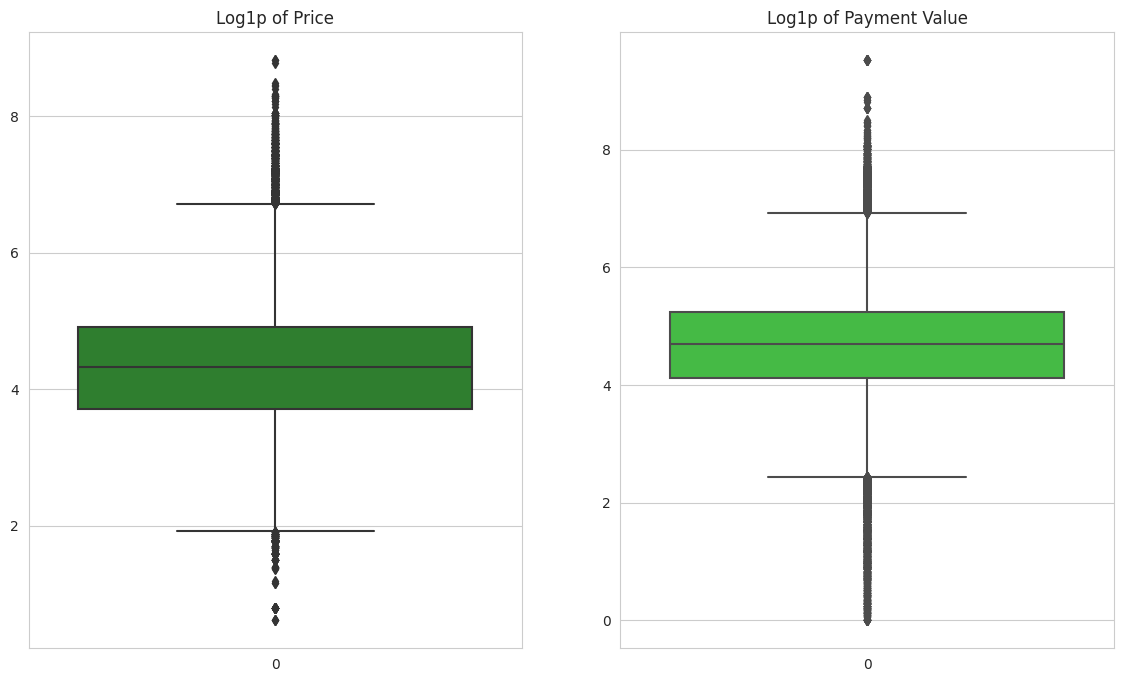

In [37]:
fig, ax = plt.subplots(figsize=(14,8), nrows=1, ncols=2)

sns.boxplot(np.log1p(orders['price']), ax=ax[0], color='forestgreen')
ax[0].set_title('Log1p of Price')

sns.boxplot(np.log1p(orders['payment_value']), ax=ax[1], color='limegreen')
ax[1].set_title('Log1p of Payment Value');

In [38]:
orders['payment_type'].value_counts()

payment_type
credit_card    87774
boleto         23190
voucher         6465
debit_card      1706
not_defined        6
Name: count, dtype: int64

In [39]:
orders.nunique()

order_id                         99439
customer_id                      99439
order_status                         8
order_purchase_timestamp         98873
order_approved_at                90891
order_delivered_carrier_date     81018
order_delivered_customer_date    96087
order_estimated_delivery_date      459
customer_unique_id               96094
customer_city                     4119
customer_state                      27
customer_zip_code_prefix         14994
product_id                       32949
seller_id                         3095
price                             5968
product_category_name               74
payment_type                         5
payment_value                    29077
payment_installments                24
review_score                         5
review_creation_date               636
seller_city                        611
geolocation_zip_code_prefix      14837
geolocation_lat                  14838
geolocation_lng                  14839
product_category_english 

In [40]:
orders['review_score'].value_counts()

review_score
5.0    66341
4.0    22319
1.0    15428
3.0     9894
2.0     4162
Name: count, dtype: int64

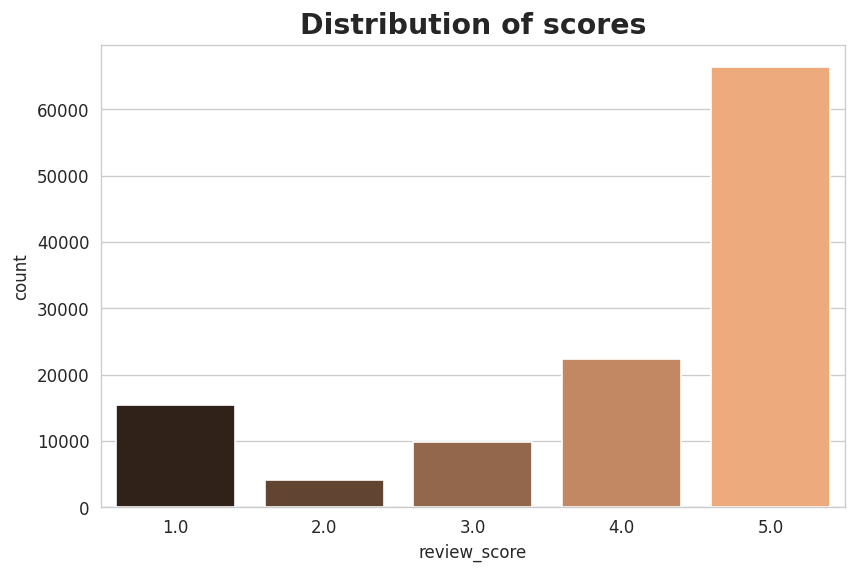

In [41]:
plt.figure(figsize=(8,5), dpi=120)
sns.countplot(x=orders['review_score'], palette='copper')
plt.title('Distribution of scores', fontsize=17, fontweight='bold', pad=7);

In [42]:
print(orders['order_purchase_timestamp'].min(), orders['order_purchase_timestamp'].max())

2016-09-04 21:15:19 2018-10-17 17:30:18


In [43]:
orders[['price','payment_value','payment_installments']].corr()

,price,payment_value,payment_installments
price,1.000000,0.739236,0.277644
payment_value,0.739236,1.000000,0.273648
payment_installments,0.277644,0.273648,1.000000


## <span style="color:transparent;">4.2 Ratings: Not Just a Popularity Contest</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    text-align: center;
    color: #6a5d50;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.08);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        4.2 Ratings: Not Just a Popularity Contest
    </h2>
</div>

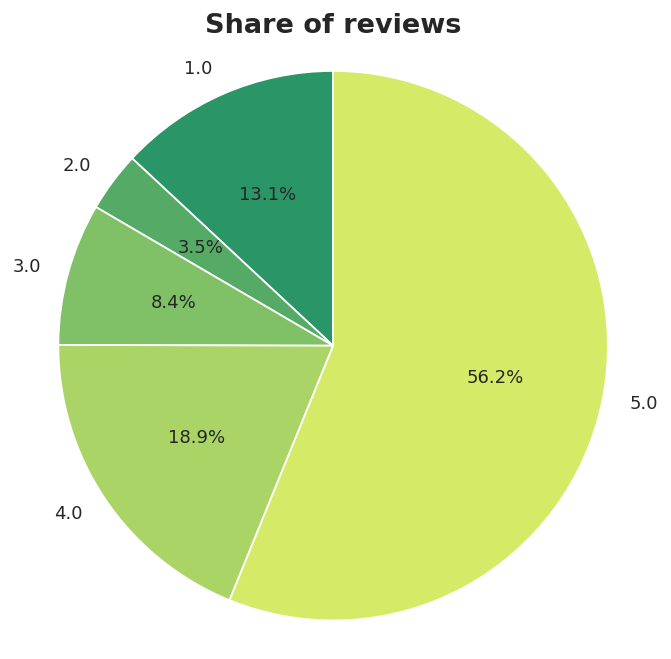

In [44]:
score_counts = orders['review_score'].value_counts().sort_index()

plt.figure(figsize=(6, 6), dpi=130)

colors = ['deepskyblue', 'mediumaquamarine', 'plum', 'sandybrown', 'indianred'] 
colors = sns.color_palette('summer', n_colors=len(score_counts))

plt.pie(score_counts, labels=score_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors)

plt.title('Share of reviews', fontsize=15, fontweight='bold', pad=7)
plt.axis('equal');

In [45]:
total_rev = reviews.groupby('review_score')['review_id'].count()
miss_rev = reviews[reviews['review_comment_message'].isnull()].groupby('review_score')['review_id'].count()

res = 100 - (miss_rev / total_rev).fillna(0)*100

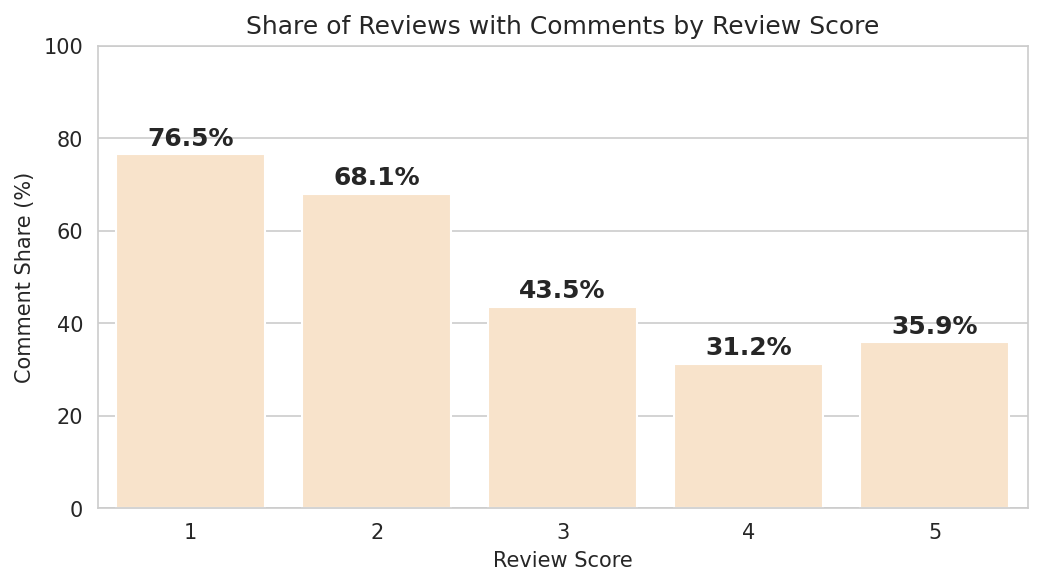

In [46]:
fig = plt.figure(figsize=(8,4), dpi=150)
ax = sns.barplot(x=res.index, y=res.values, color='bisque')

for i, v in enumerate(res.values):
    ax.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=12, fontweight='bold')

plt.title("Share of Reviews with Comments by Review Score")
plt.xlabel("Review Score")
plt.ylabel("Comment Share (%)")
plt.ylim(0, 100);

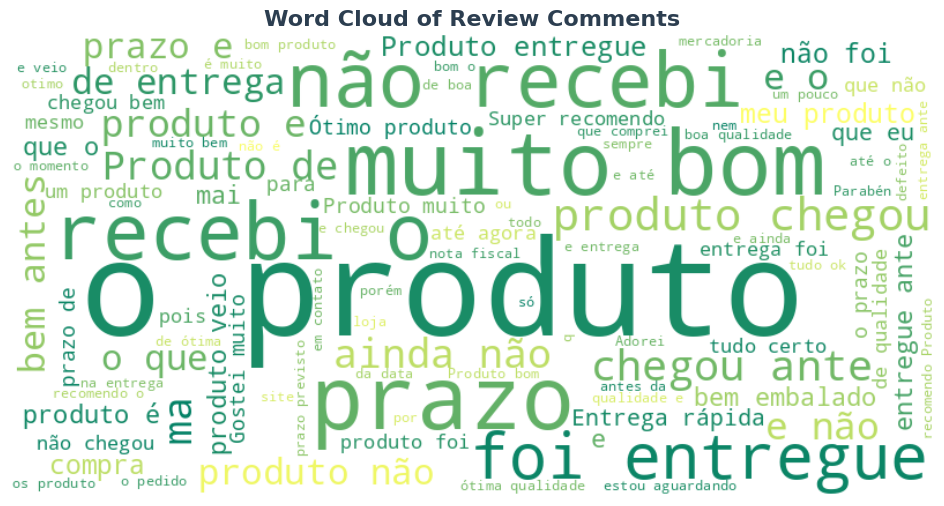

In [47]:
all_reviews = " ".join(reviews["review_comment_message"].dropna())  

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="summer", max_words=100).generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Review Comments", fontsize=16, fontweight="bold", color="#2C3E50");

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    color: #6a5d50;
    position: relative;
    border-radius: 20px 20px 40px 40px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4);
    filter: brightness(1.08);
    overflow: hidden;">
    <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        Summary
    </h3>
    <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">
        Our word cloud analysis of customer reviews highlights key themes related to <b>product delivery, timing, and quality</b>.  
        The most frequently used words (translated from Portuguese) include:  
        <ul>
            <li><b>produto</b> → product</li>
            <li><b>entregue</b> → delivered</li>
            <li><b>chegou</b> → arrived</li>
            <li><b>prazo</b> → deadline / delivery time</li>
            <li><b>recebi</b> → received</li>
            <li><b>não</b> → not</li>
            <li><b>bom</b> → good</li>
            <li><b>antes</b> → before / earlier</li>
            <li><b>compra</b> → purchase</li>
            <li><b>qualidade</b> → quality</li>
        </ul>
<p>This indicates that many reviews focus on <b>delivery timing issues</b> ("prazo", "chegou antes"), 
<b>product reception</b> ("recebi", "entregue"), and <b>quality feedback</b> ("bom", "qualidade").</p>

<p>Negative sentiment is also visible through words like <b>"não" (not)</b> and 
<b>"ainda" (still, as in "still not received")</b>.</p>

<p>Furthermore, our analysis of missing review comments reveals that 
<b>negative reviews (1-2 stars) are more likely to contain written feedback</b>, while 
<b>higher ratings (4-5 stars) often lack text comments</b>.</p>

<p>This suggests that dissatisfied customers tend to provide detailed feedback, whereas 
satisfied customers typically leave only a rating.</p>

<p>These insights highlight areas for improvement, particularly in 
<b>delivery reliability and customer satisfaction</b>.</p>

</div>


In [48]:
orders['delivery_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

In [49]:
orders['delivery_days'].value_counts().sort_values(ascending=False).head()

delivery_days
7    9180
6    8161
8    8149
9    7273
5    7023
Name: count, dtype: int64

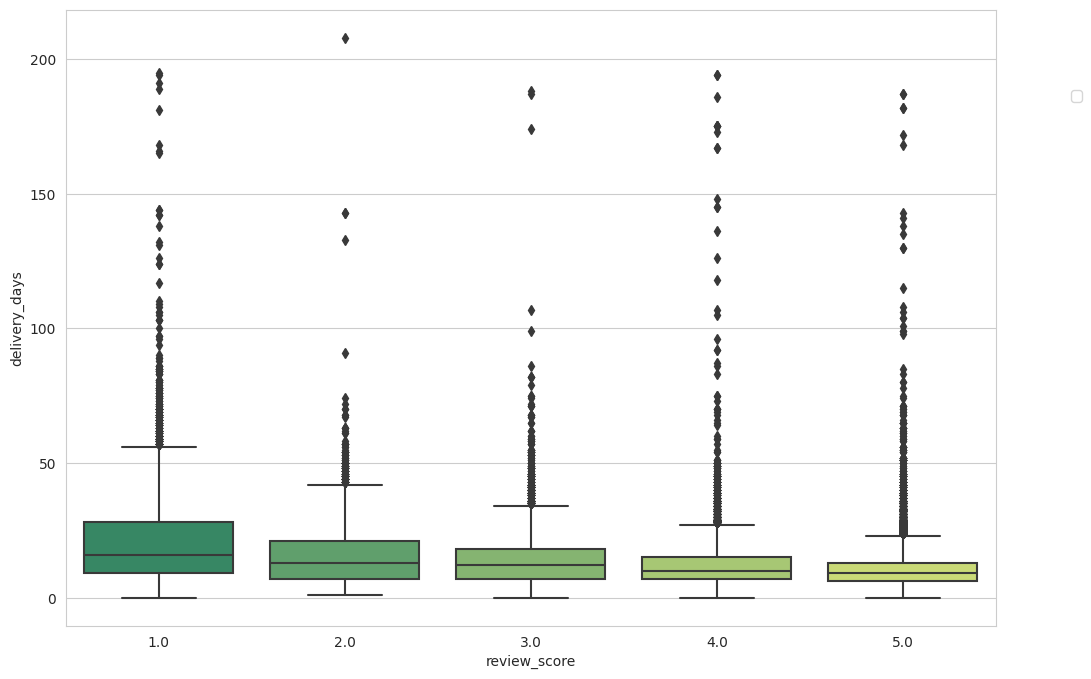

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(x=orders['review_score'], y=orders['delivery_days'], palette='summer')
plt.legend( bbox_to_anchor=(1.1, 0.88));

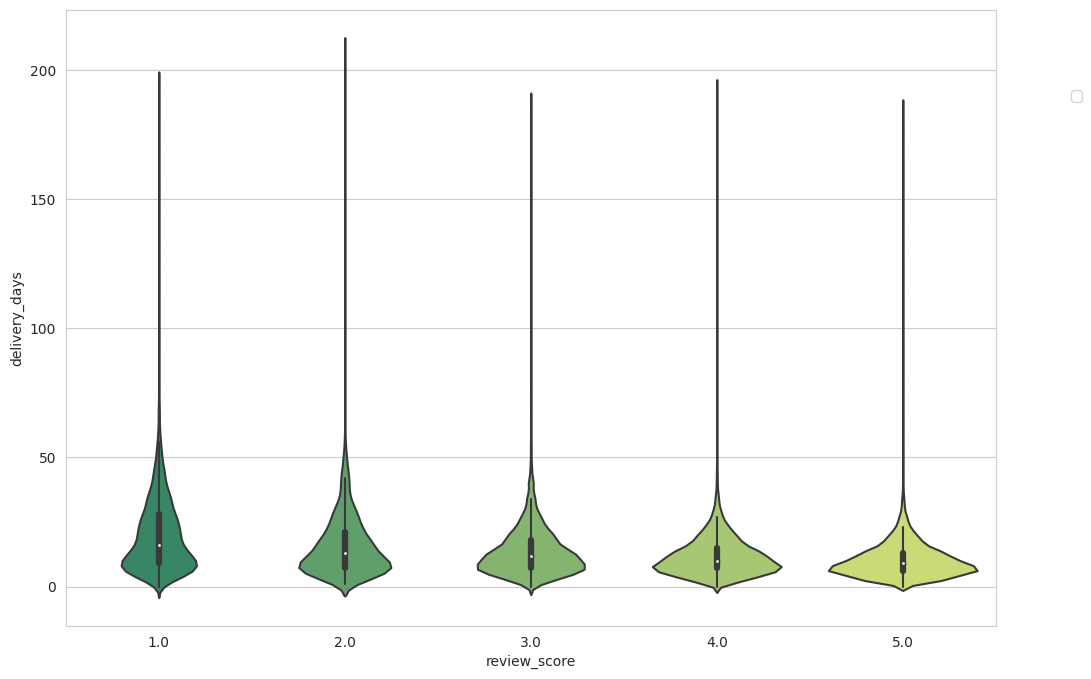

In [51]:
plt.figure(figsize=(12,8))
sns.violinplot (x=orders['review_score'], y=orders['delivery_days'], palette='summer')
plt.legend( bbox_to_anchor=(1.1, 0.88));

In [52]:
orders.groupby('review_score')['delivery_days'].median()

review_score
1.0    16.0
2.0    13.0
3.0    12.0
4.0    10.0
5.0     9.0
Name: delivery_days, dtype: float64


---

**Delivery time has a clear impact on customer satisfaction.**  
Orders with lower review scores tend to have significantly longer delivery times.  
The median delivery duration drops consistently from 16 days (score 1) to 9 days (score 5),  
indicating that faster delivery strongly correlates with higher customer ratings.

---


In [53]:
orders['bad_score'] = orders['review_score']<=3
orders.groupby('product_category_english')['bad_score'].mean().sort_values(ascending=False)

product_category_english
diapers_hygiene                    0.538462
portable_kitchen_food_preparers    0.533333
insurance_services                 0.500000
pc_gamer                           0.400000
office_furniture                   0.392617
                                     ...   
fashion_children_clothing          0.125000
books_general_interest             0.123894
flowers                            0.121212
construction_tools_tools           0.095238
cds_dvds_music                     0.071429
Name: bad_score, Length: 74, dtype: float64

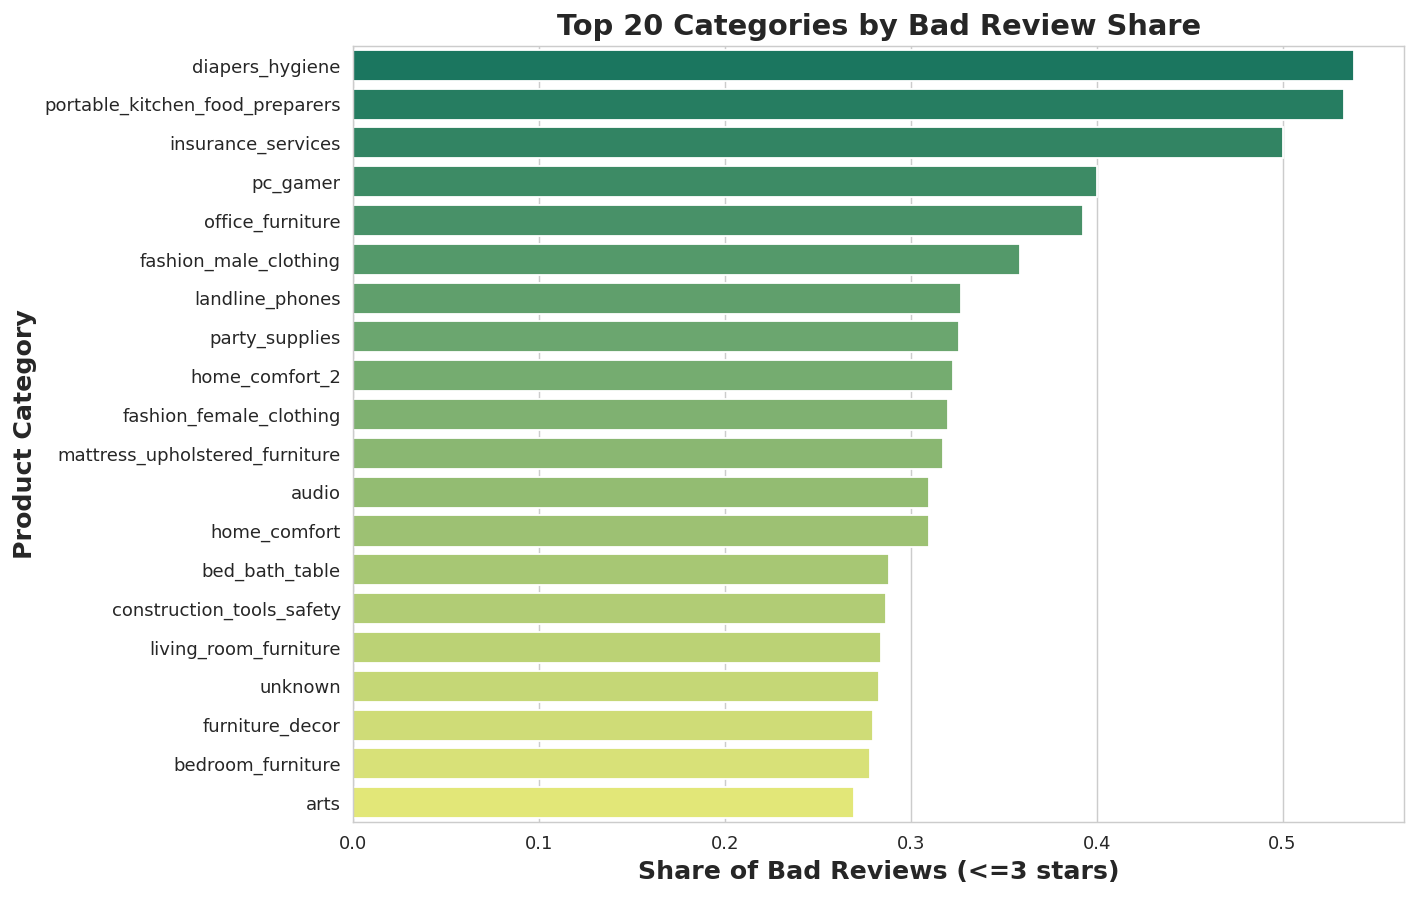

In [54]:
bad_scores = (
    orders.groupby('product_category_english')['bad_score']
    .mean()
    .sort_values(ascending=False)
    .head(20) 
)

plt.figure(figsize=(11, 7),  dpi=130)
sns.barplot(x=bad_scores.values, y=bad_scores.index, palette="summer")
plt.xlabel('Share of Bad Reviews (<=3 stars)', fontsize=14, fontweight="bold")
plt.ylabel('Product Category', fontsize=14, fontweight="bold")
plt.title('Top 20 Categories by Bad Review Share', fontsize=16, fontweight="bold")
plt.tight_layout();

In [55]:
review_dist = pd.crosstab(
    orders['product_category_english'],
    orders['review_score'],
    normalize='index')

review_dist['bad_share'] = review_dist[[1.0, 2.0, 3.0]].sum(axis=1)
review_dist['good_share'] = review_dist[[4.0, 5.0]].sum(axis=1)

In [56]:
category_counts = orders['product_category_english'].value_counts()
valid_categories = category_counts[category_counts > 100].index
filtered_reviews = review_dist.loc[valid_categories]

In [57]:
filtered_reviews.shape

(54, 7)

In [58]:
top_bad = filtered_reviews.sort_values(by='bad_share', ascending=False).head(15)

top_good = filtered_reviews.sort_values(by='good_share', ascending=False).head(15)

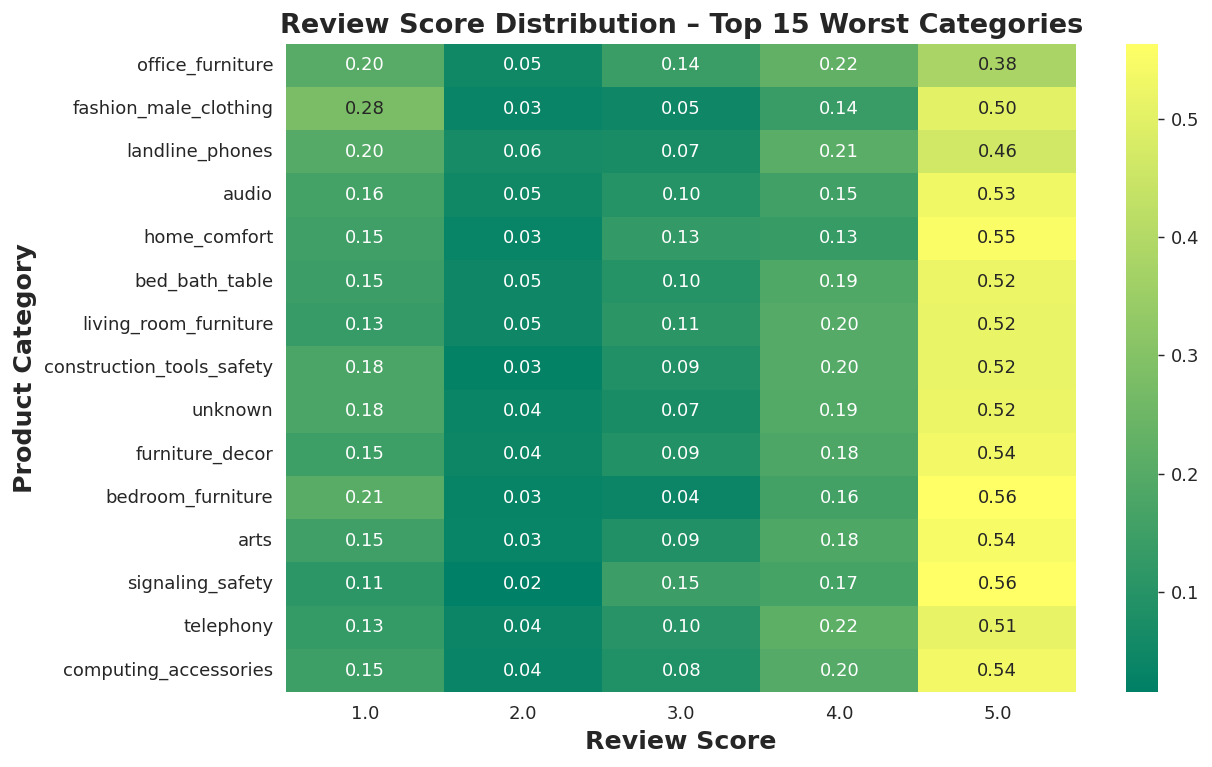

In [59]:
plt.figure(figsize=(10, 6), dpi=130)
sns.heatmap(top_bad[[1.0, 2.0, 3.0, 4.0, 5.0]], annot=True, cmap='summer', fmt='.2f')
plt.title('Review Score Distribution – Top 15 Worst Categories', fontsize=15, fontweight='bold')
plt.ylabel('Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Review Score', fontsize=14, fontweight='bold')
plt.tight_layout();

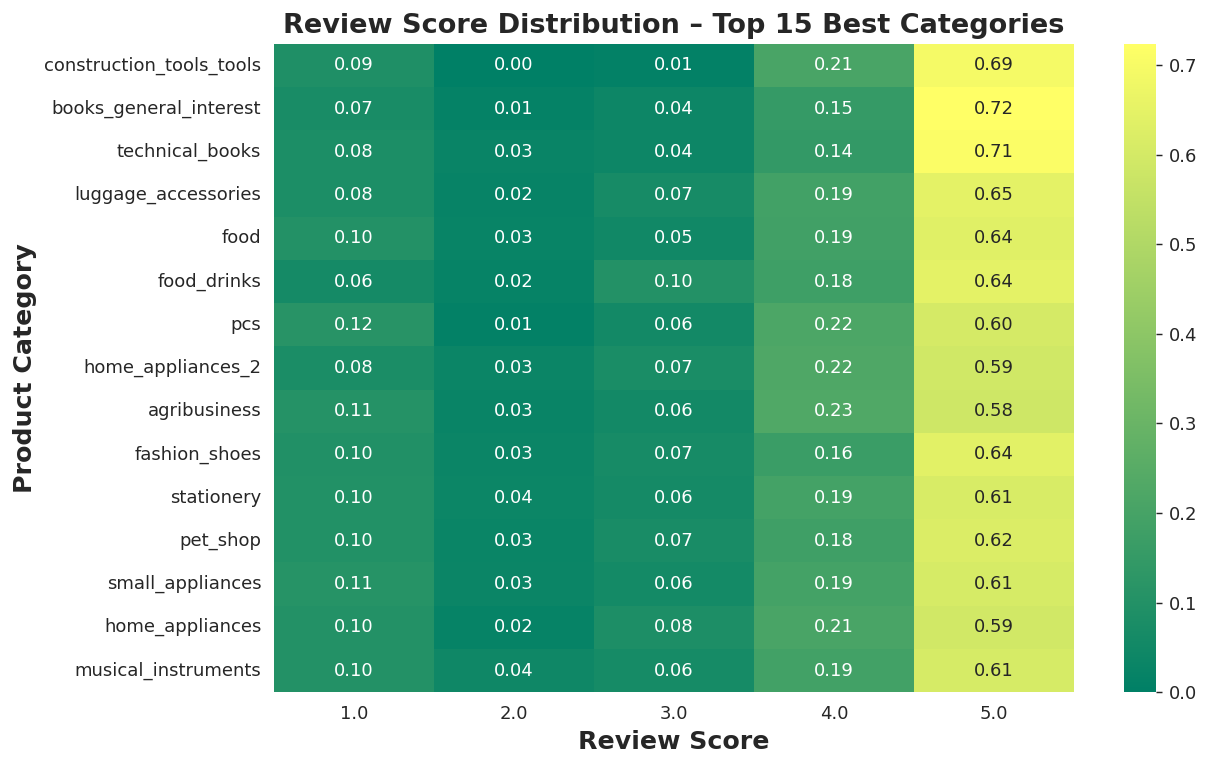

In [60]:
plt.figure(figsize=(10, 6), dpi=130)
sns.heatmap(top_good[[1.0, 2.0, 3.0, 4.0, 5.0]], annot=True, cmap='summer', fmt='.2f')
plt.title('Review Score Distribution – Top 15 Best Categories', fontsize=15, fontweight='bold')
plt.ylabel('Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Review Score', fontsize=14, fontweight='bold')
plt.tight_layout();

<div style="  background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); padding: 25px; color: #6a5d50; position: relative; border-radius: 20px 20px 40px 40px; box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4); filter: brightness(1.08); overflow: hidden;"> <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);"> Summary </h3> <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;"> We analyzed how product review scores vary across categories, with a focus on the share of negative feedback (scores ≤ 3). To ensure statistical relevance, only categories with more than 100 orders were included. We visualized the distribution of ratings for the 15 best and worst-performing categories. The most problematic areas — in terms of customer dissatisfaction — include <b>office furniture, men's clothing, and landline phones</b>. Meanwhile, customers consistently rated <b>tools, books, and luggage</b> highly. These results provide a strong foundation for further analysis, especially regarding delivery and payment factors that may be driving these differences in satisfaction. </p> </div>

## <span style="color:transparent;">4.3 Categories: What’s Actually Moving Off the Shelves?</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    text-align: center;
    color: #6a5d50;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.08);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        4.3 Categories: What’s Actually Moving Off the Shelves?
    </h2>
</div>

In [61]:
delivered = orders[orders['order_status'] == 'delivered'].copy()

In [62]:
palette = sns.color_palette("viridis", 20)
top_palette = palette[-10:]
tail_palette = palette[:10]

def plot_pair(data_top, data_tail, title_top, title_tail, xlabel, ylabel,
              xlim_top=None, xlim_bot=None):
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 13), dpi=120,
                           gridspec_kw={'height_ratios': [1, 1], 'hspace': 0.5})

    sns.barplot(x=data_top.values, y=data_top.index, ax=ax[0], palette=top_palette)
    ax[0].set_title(title_top, fontsize=15, weight='bold', pad=15)
    ax[0].set_xlabel('')
    ax[0].set_ylabel(ylabel, labelpad=55, fontsize=13, weight='bold')
    ax[0].spines[['top', 'right']].set_visible(False)
    ax[0].tick_params(axis='y', labelsize=11)
    if xlim_top:
        ax[0].set_xlim(xlim_top)

    for container in ax[0].containers:
        ax[0].bar_label(container, padding=3, fontsize=9)

    sns.barplot(x=data_tail.values, y=data_tail.index, ax=ax[1], palette=tail_palette)
    ax[1].set_title(title_tail, fontsize=15, weight='bold', pad=20)
    ax[1].set_xlabel(xlabel, labelpad=10, fontsize=13, weight='bold')
    ax[1].set_ylabel(ylabel, fontsize=13, labelpad=15, weight='bold')
    ax[1].spines[['top', 'right']].set_visible(False)
    ax[1].tick_params(axis='y', labelsize=11)
    if xlim_bot:
        ax[1].set_xlim(xlim_bot)

    for container in ax[1].containers:
        ax[1].bar_label(container, padding=3, fontsize=9)

    fig.canvas.draw()
    y0 = (ax[0].get_position().y0 + ax[1].get_position().y1) / 2
    line = plt.Line2D([-0.12, 1], [y0, y0], transform=fig.transFigure,
                      color='gray', linestyle='--', linewidth=3)
    fig.add_artist(line)

    plt.show()

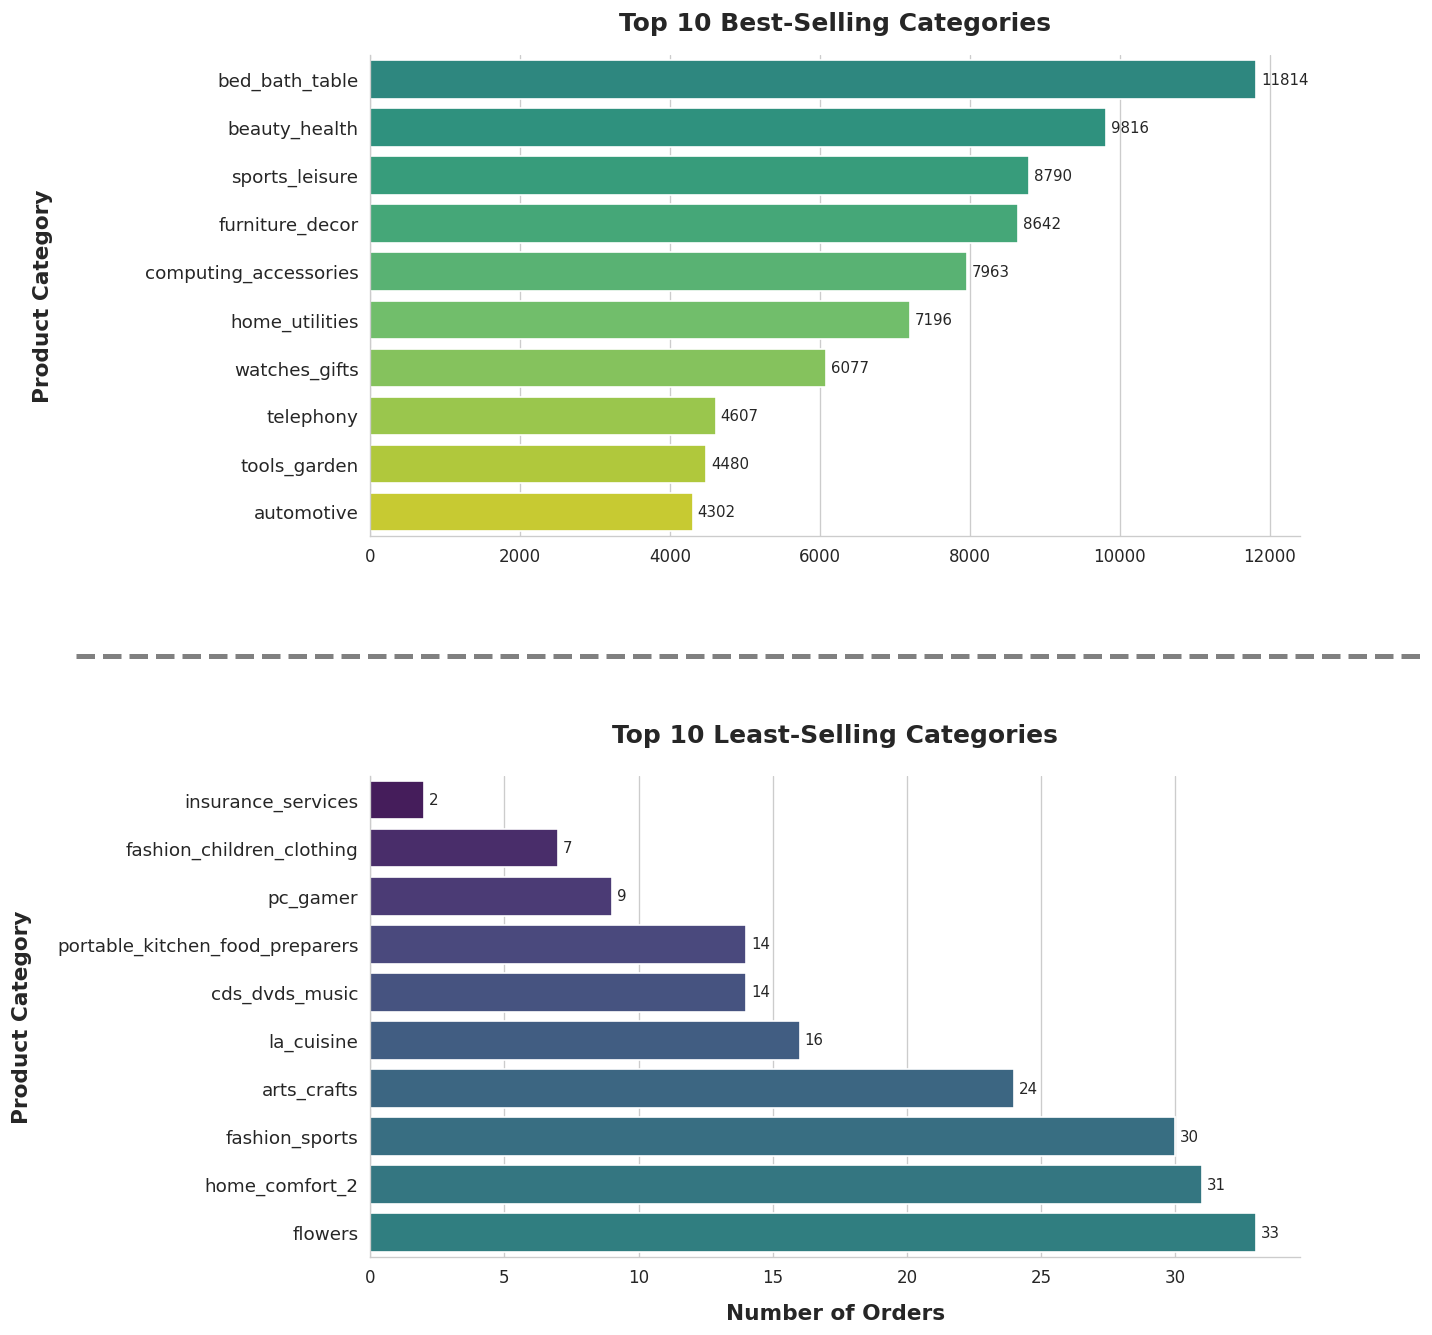

In [63]:
top_sales = delivered['product_category_english'].value_counts().nlargest(10)
tail_sales = delivered['product_category_english'].value_counts().nsmallest(10)

plot_pair(
    top_sales,
    tail_sales,
    'Top 10 Best-Selling Categories',
    'Top 10 Least-Selling Categories',
    xlabel='Number of Orders',
    ylabel='Product Category'
)

> ***Scale is adjusted for better visibility "Top 10 Least-Selling Categories"***

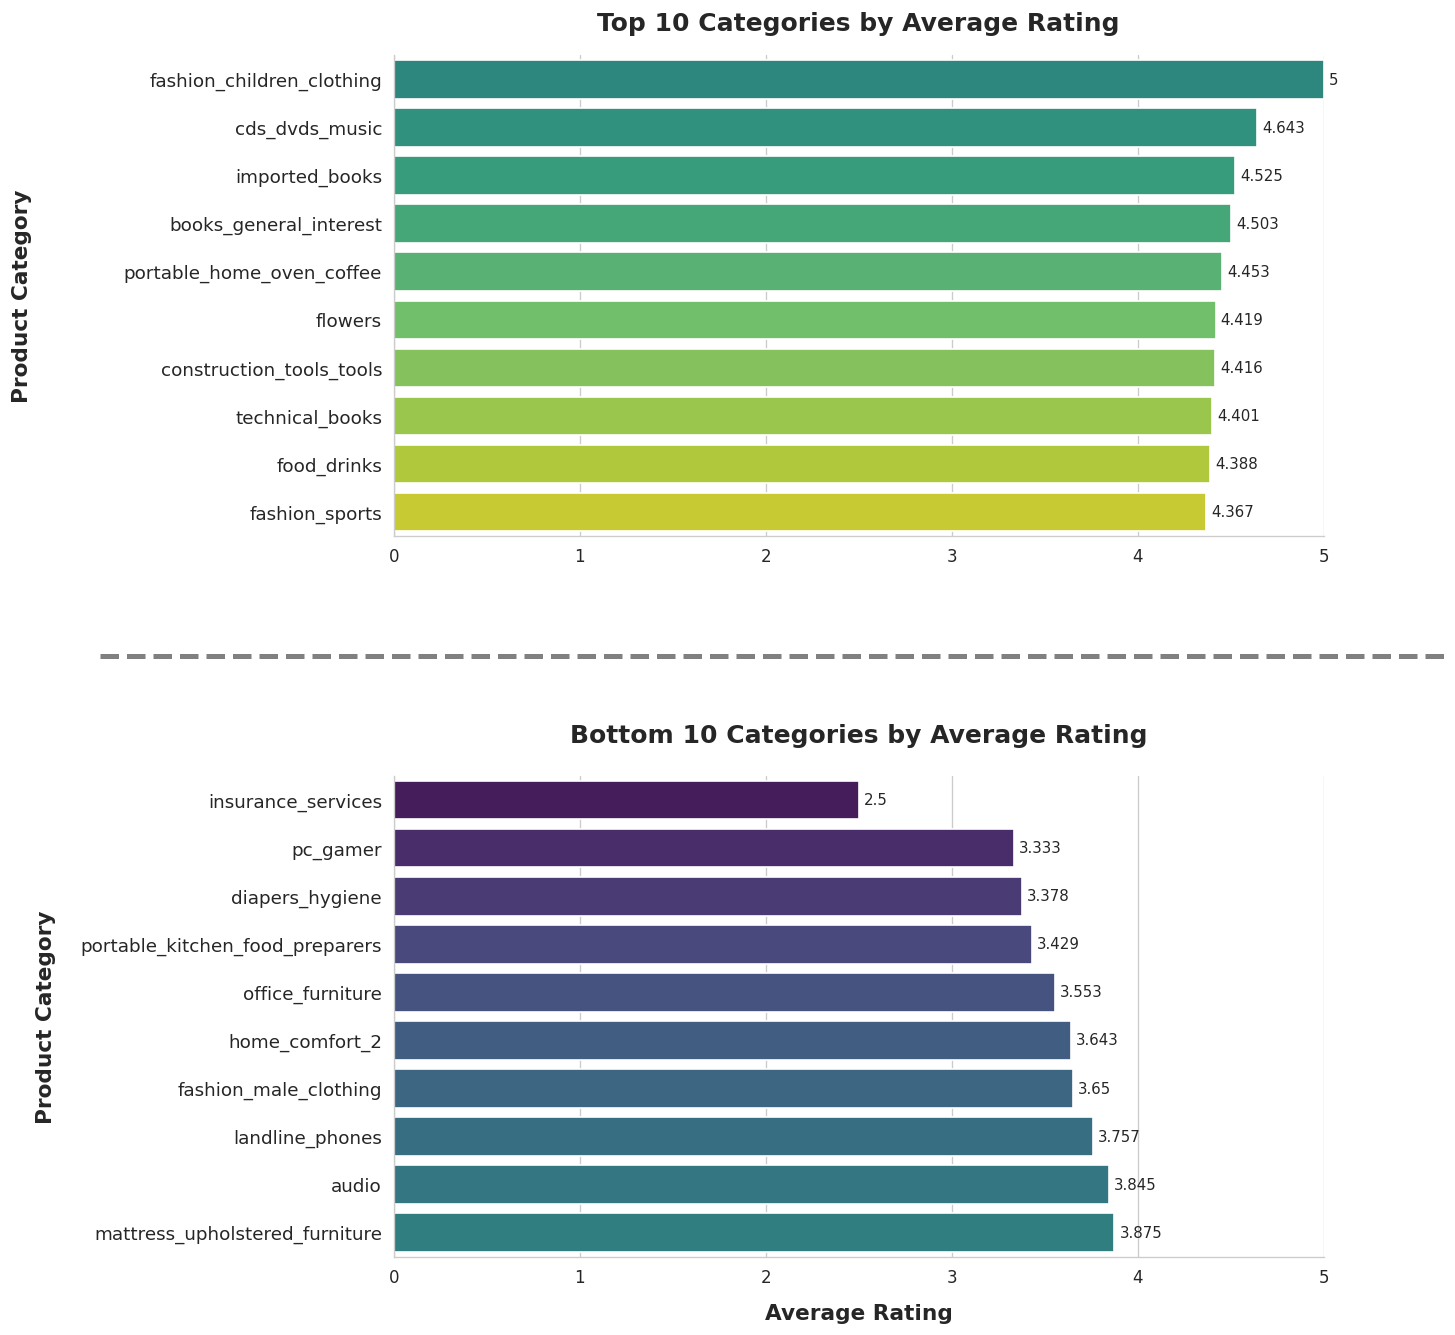

In [64]:
average_rating_top = delivered.groupby('product_category_english')['review_score'].mean().round(3).nlargest(10)
average_rating_tail = delivered.groupby('product_category_english')['review_score'].mean().round(3).nsmallest(10)

plot_pair(
    average_rating_top,
    average_rating_tail,
    'Top 10 Categories by Average Rating',
    'Bottom 10 Categories by Average Rating',
    xlabel='Average Rating',
    ylabel='Product Category',
    xlim_top=(0, 5),
    xlim_bot=(0, 5)
)

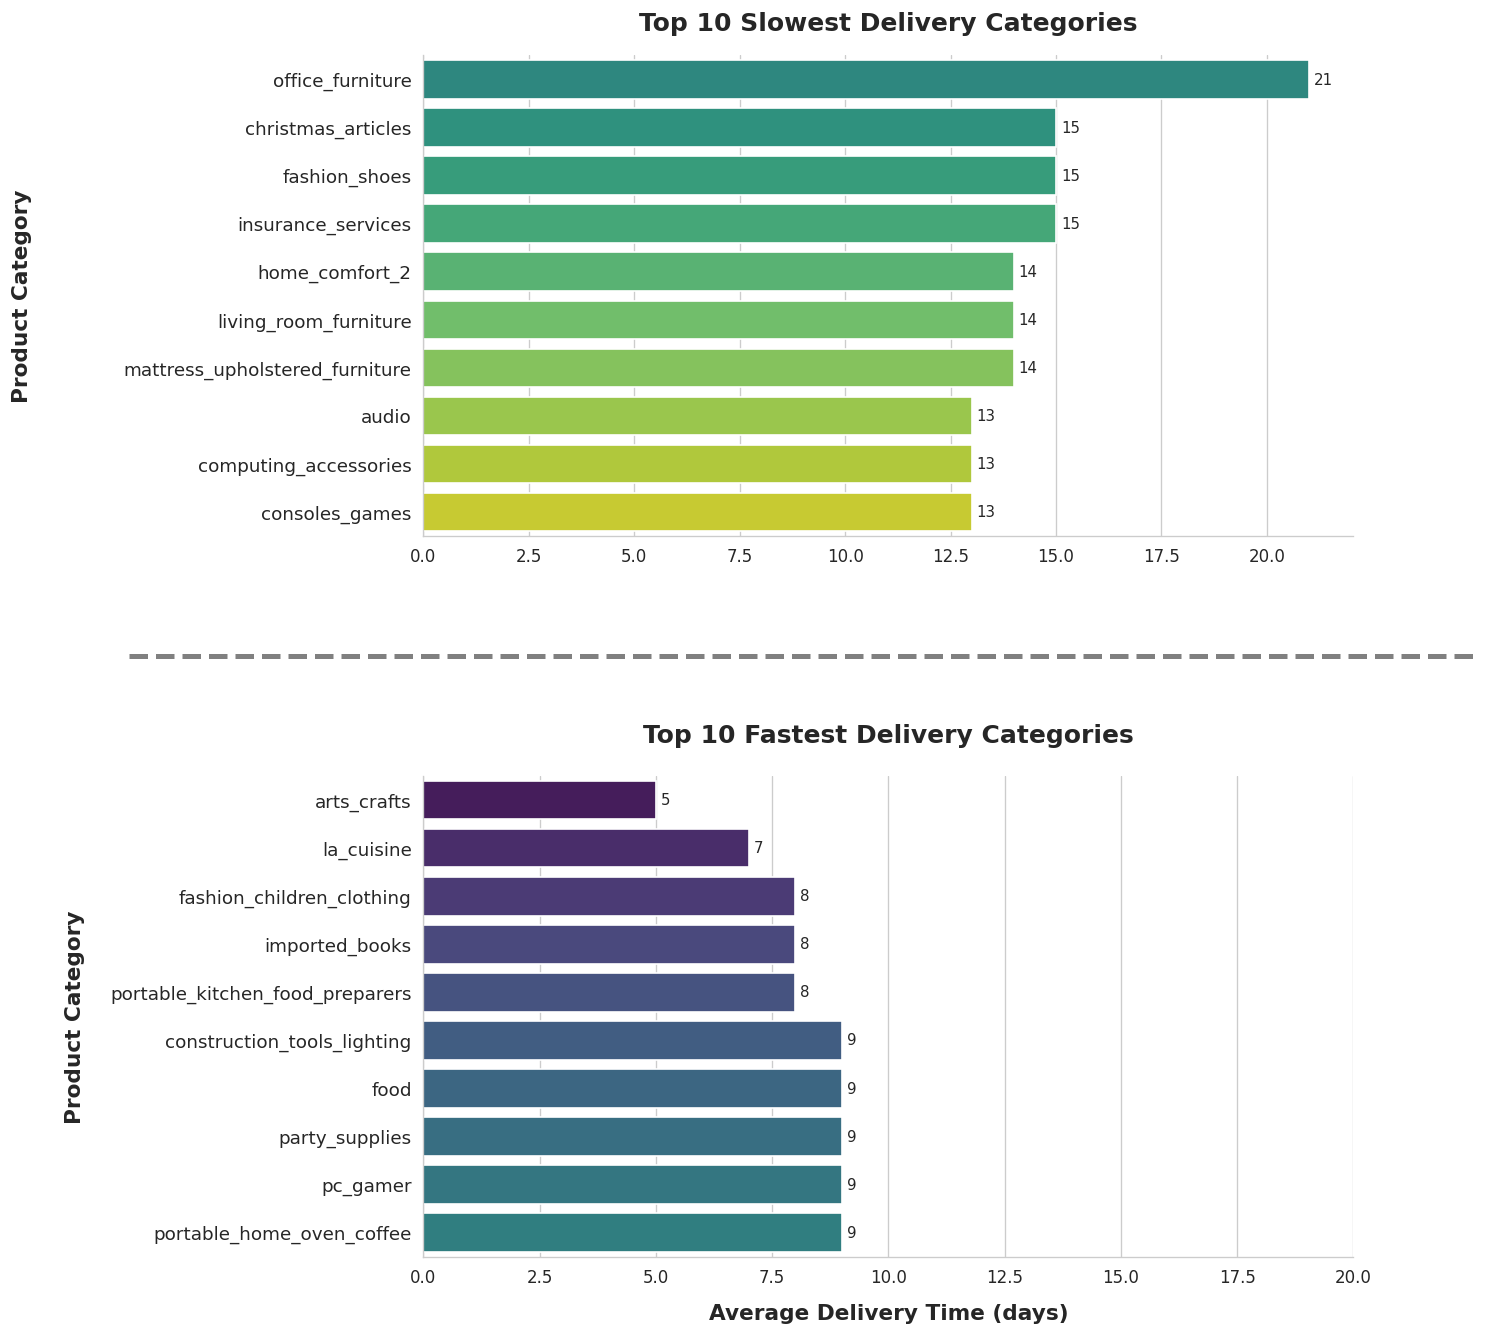

In [65]:
mean_deliv_time_top = delivered.groupby('product_category_english')['delivery_days'].mean().round().astype('int64').nlargest(10)
mean_deliv_time_tail = delivered.groupby('product_category_english')['delivery_days'].mean().round().astype('int64').nsmallest(10)

plot_pair(
    mean_deliv_time_top,
    mean_deliv_time_tail,
    'Top 10 Slowest Delivery Categories',
    'Top 10 Fastest Delivery Categories',
    xlabel='Average Delivery Time (days)',
    ylabel='Product Category',
    xlim_bot=(0,20)
)

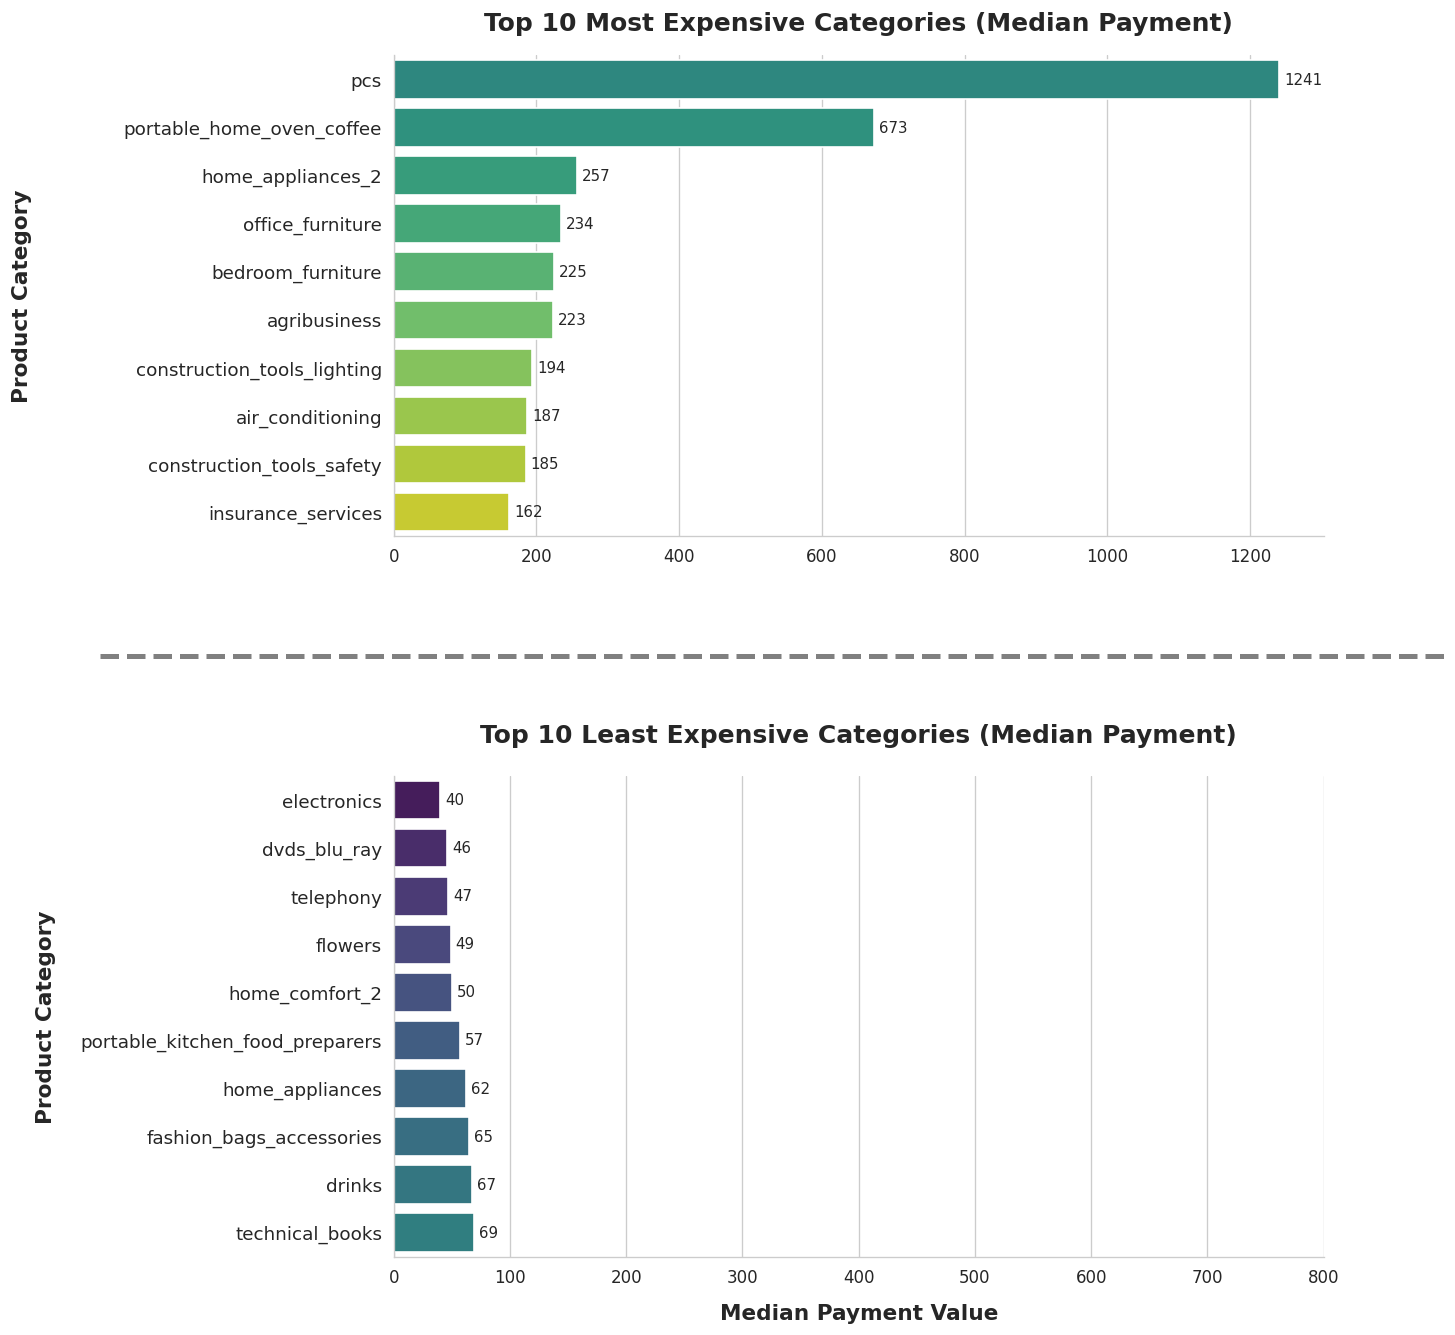

In [66]:
mean_payment_top = delivered.groupby('product_category_english')['payment_value'].median().round().astype('int64').nlargest(10)
mean_payment_tail = delivered.groupby('product_category_english')['payment_value'].median().round().astype('int64').nsmallest(10)

plot_pair(
    mean_payment_top,
    mean_payment_tail,
    'Top 10 Most Expensive Categories (Median Payment)',
    'Top 10 Least Expensive Categories (Median Payment)',
    xlabel='Median Payment Value',
    ylabel='Product Category',
    xlim_bot=(0, 800)
)

<div style="  background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); padding: 25px; color: #6a5d50; position: relative; border-radius: 20px 20px 40px 40px; box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4); filter: brightness(1.08); overflow: hidden;">
  <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
    Summary
  </h3>
  <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">
    This deep-dive into Brazilian e-commerce reveals a landscape shaped by a few clear winners — and many forgettable experiments.
    <br><br>
    📦 <b>Sales concentration</b> is extreme. Overwhelming demand is focused on broad, utility-driven categories like <b>bed_bath_table</b> (11,814 orders), <b>beauty_health</b>, and <b>sports_leisure</b>. These products are everyday essentials — not glamorous, but they sell. In contrast, categories like <b>insurance_services</b> (2 orders) and <b>pc_gamer</b> (9 orders) are virtually invisible. Whether due to lack of demand, poor cataloging, or logistical neglect, they add noise rather than value.
    <br><br>
    ⭐ <b>Customer satisfaction</b> doesn’t always follow the money. Highest-rated categories include <b>fashion_children_clothing</b>, <b>cds_dvds_music</b>, and especially <b>books</b> (general and technical). These areas spark genuine delight, even when sales are low. Meanwhile, some relatively active segments suffer from poor feedback — <b>office_furniture</b>, <b>men’s clothing</b>, and <b>landline_phones</b> all rank near the bottom in ratings, with averages hovering dangerously close to 3.5. That's not a hiccup — it's a warning.
    <br><br>
    🚚 <b>Delivery time</b> is another axis of pain. Products like <b>office_furniture</b> and <b>mattresses</b> take 2+ weeks on average to reach the customer, dragging down satisfaction and likely increasing churn. On the bright side, <b>arts_crafts</b>, <b>children’s clothing</b>, and <b>imported_books</b> are delivered within 5–8 days, showing that fast logistics are absolutely achievable — when prioritized.
    <br><br>
    💰 <b>Spending behavior</b> reveals a sharp split between luxury and commodity. High average payments appear in <b>pcs</b> (₽1241), <b>coffee ovens</b>, and <b>furniture</b>, while the bottom tier includes <b>telephony</b>, <b>flowers</b>, and <b>drinks</b>, averaging under ₽70. Crucially, some high-priced categories are also poorly rated and slow to deliver — the worst possible combo for long-term viability.
    <br><br>
    📉 In short, categories that combine low volume, poor reviews, and slow shipping — like <b>insurance_services</b>, <b>office_furniture</b>, and <b>home_comfort_2</b> — are operational black holes. Meanwhile, the sweet spot lies in fast-moving, well-reviewed essentials with efficient logistics. If there's a growth strategy hiding here, it's to trim the dead wood and scale what customers already love.
  </p>
</div>


## <span style="color:transparent;">4.4 Payments: Cash, Cards, or Vouchers?</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    text-align: center;
    color: #6a5d50;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.08);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        4.4 Payments: Cash, Cards, or Vouchers?
    </h2>
</div>

In [67]:
orders['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card', 'not_defined'],
      dtype=object)


---

**Boleto** is a widely used payment method in Latin America, particularly in Brazil. Introduced in 1993, it was designed to facilitate cash payments. It functions similarly to a proforma invoice and can be paid at various locations, including ATMs, bank branches, internet banking, post offices, lottery agents, and some supermarkets, as long as it is within the due date.

For better understanding, you could compare **Boleto** to systems like **direct debit** or **bank transfer** in many other countries, where payments are made outside the traditional credit card system, often using a pre-issued invoice or bill. A more specific comparison might be with **BillPay** systems in the U.S. or **SEPA Direct Debit** in Europe, where payments are processed through a network of banks, but **Boleto** is more widely accessible due to its integration with multiple payment points.

---


In [68]:
payment_type_share = orders['payment_type'].value_counts(normalize=True).nlargest(4)
payment_type_share = (payment_type_share*100).round(2)

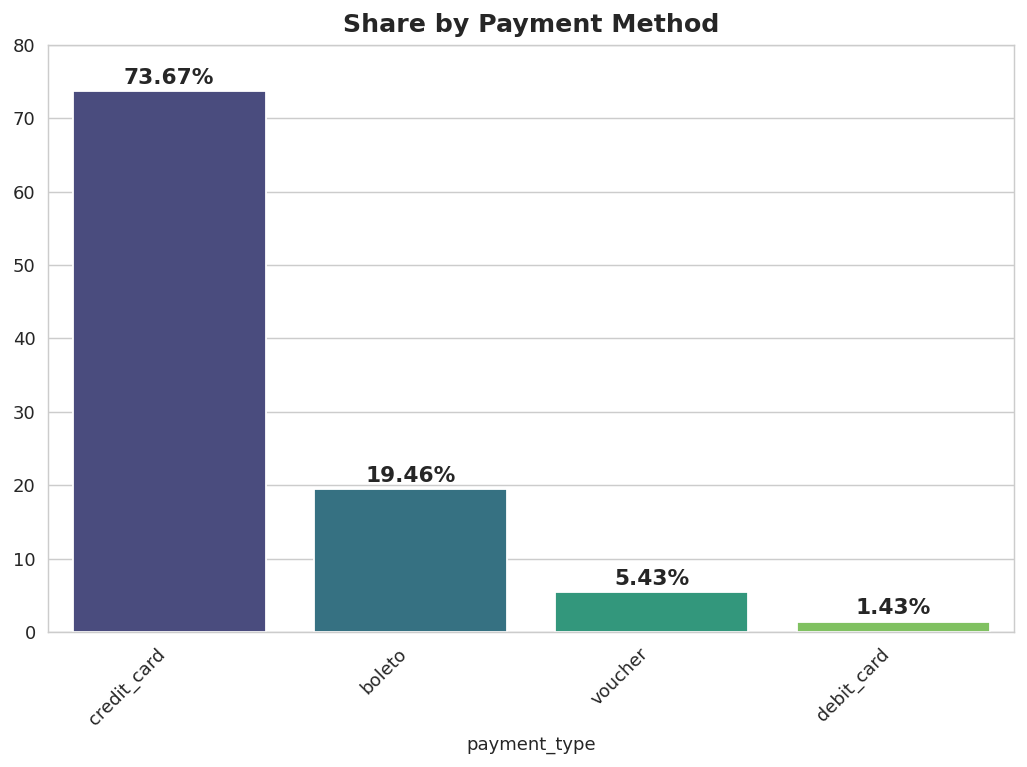

In [69]:
plt.figure(figsize=(8,6), dpi=130)

sns.barplot(x=payment_type_share.index, y=payment_type_share.values, palette='viridis')

plt.title('Share by Payment Method', fontsize=14, fontweight='bold', pad=7)

for i, v in enumerate(payment_type_share.values):
    plt.text(i, v + 1, f'{v}%', ha='center', fontsize=12, fontweight='bold')

plt.yticks(range(0, int(payment_type_share.max()) + 10, 10))

plt.xticks(rotation=45, ha='right')

plt.tight_layout();

In [70]:
mean_payment = orders.groupby('payment_type')['payment_value'].mean().round().nlargest(4)

In [71]:
installment_ratio = (orders['payment_installments'] > 1).mean() * 100
print(f'The proportion of installment orders: {installment_ratio:.2f}%')

The proportion of installment orders: 50.10%


In [72]:
installment_by_category = orders.groupby('product_category_english')['payment_installments'].apply(lambda x: (x > 1).mean()).nlargest(10)
installment_top_categories = (installment_by_category*100).round()

In [73]:
city_avg_payment = orders.groupby('customer_city')['payment_value'].mean().round().sort_values(ascending=False)
print(city_avg_payment)

customer_city
pianco                          2325.0
nova esperanca do piria         2253.0
engenheiro navarro              2107.0
mariental                       1868.0
paranatinga                     1687.0
                                 ...  
polo petroquimico de triunfo      21.0
sabaudia                          20.0
igaracu do tiete                  20.0
demerval lobao                    20.0
sao sebastiao de campos           19.0
Name: payment_value, Length: 4119, dtype: float64


In [74]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "domain"}, {"type": "xy"}],
           [{"colspan": 2}, None]],
    subplot_titles=(
        "Payment Type Distribution (%)",
        "Mean Payment Value (R$)",
        "Top Categories by Installment Usage (%)"
    )
)

fig.add_trace(
    go.Pie(labels=payment_type_share.index,
           values=payment_type_share.values,
           hole=0.5,
           marker=dict(colors=["#4f442b", "#a38f6f", "#d3c4ab", "#eee6dc"])),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=mean_payment.index,
           y=mean_payment.values,
           marker_color=["#4f442b", "#a38f6f", "#d3c4ab", "#eee6dc"],
           text=[f"R${v}" for v in mean_payment.values],
           textposition='auto'),
    row=1, col=2
)

fig.add_trace(
    go.Bar(
        y=installment_top_categories.index[::-1],
        x=installment_top_categories.values[::-1],
        orientation='h',
        marker_color="#a38f6f",
        text=[f"{v:.0f}%" for v in installment_top_categories.values[::-1]],
        textposition='auto'
    ),
    row=2, col=1
)


fig.update_layout(
    height=800, width=900,
    title_text="Brazilian E-commerce: Payment Behavior Overview",
    showlegend=False,
    plot_bgcolor="rgba(246, 241, 231, 1)",
    paper_bgcolor="rgba(246, 241, 231, 1)",
    font=dict(family="Poppins, sans-serif", color="#4a4035"),
    title_font_size=22
)

fig.update_annotations(font_size=16)

fig.show()

<div style="  background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); padding: 25px; color: #6a5d50; position: relative; border-radius: 20px 20px 40px 40px; box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4); filter: brightness(1.08); overflow: hidden;">
  <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
    Payment Behavior Analysis
  </h3>
  <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">
    Brazilian e-commerce payments present a clear hierarchy in both method preference and consumer behavior.
    <br><br>
    💳 <b>Credit cards dominate</b> the landscape, accounting for a striking 73.67% of all payments. The second most popular method, <b>boleto bancário</b>, trails far behind at 19.46%, followed by vouchers (5.43%) and debit cards (1.43%). This preference speaks not only to access but also to the flexibility Brazilian consumers expect.
    <br><br>
    🧾 <b>Installments are the norm</b> — not the exception. Over half of all credit card transactions (50.10%) are paid in installments, effectively blurring the line between affordability and deferred spending. This pattern is especially pronounced in high-ticket or aspirational categories like <b>PCs</b> (75% installment rate), <b>kitchenware</b>, <b>mattresses</b>, and <b>home appliances</b>. Even in fashion and gift categories, installment usage often exceeds 60%.
    <br><br>
    💰 <b>Median payment values</b> reinforce this divide. Credit card and boleto users spend similarly (R180 and R177 respectively), while debit card users spend slightly less (R151). Vouchers show the lowest median at just R67 — indicating their limited use in premium segments.
    <br><br>
    In short, Brazil’s payment structure is heavily credit-driven, with strong reliance on installment plans for both essentials and lifestyle goods. Merchants and platforms that accommodate — or incentivize — this behavior are better positioned to drive conversion and basket size. Conversely, any limitations on credit usage or installment options could act as a major friction point in the purchase journey.
  </p>
</div>


---
---

---
---

In [75]:
state_mapping = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas', 'BA': 'Bahia',
    'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo', 'GO': 'Goiás',
    'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul', 'MG': 'Minas Gerais',
    'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná', 'PE': 'Pernambuco', 'PI': 'Piauí',
    'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte', 'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina', 'SP': 'São Paulo',
    'SE': 'Sergipe', 'TO': 'Tocantins'
}

legend_text = '<br>'.join([
    f"<b>{abbr}</b> → {name}"
    for abbr, name in sorted(state_mapping.items(), key=lambda x: x[1])
])


In [76]:
state_group = orders.groupby('customer_state').agg(
    median_payment=('payment_value', 'median'),
    order_count=('customer_state', 'count'),
    lat=('geolocation_lat', 'median'), 
    lng=('geolocation_lng', 'median')
).reset_index()

state_group['median_payment'] = state_group['median_payment'].round()

def assign_group(count):
    if count >= 5000:
        return 'Large (≥ 5000)'
    elif count >= 1000:
        return 'Medium (1000–4999)'
    else:
        return 'Small (< 1000)'

state_group['group'] = state_group['order_count'].apply(assign_group)

group_colors = {
    'Large (≥ 5000)': '#ef476f',    
    'Medium (1000–4999)': '#ffd166', 
    'Small (< 1000)': '#06d6a0'     
}
group_sizes = {
    'Large (≥ 5000)': 20,
    'Medium (1000–4999)': 12,
    'Small (< 1000)': 7
}

state_group['color'] = state_group['group'].map(group_colors)
state_group['scaled_size'] = state_group['group'].map(group_sizes)

# Построение карты
fig = px.scatter_geo(
    state_group,
    lat='lat',
    lon='lng',
    size='scaled_size',
    hover_name='customer_state',
    hover_data={
        'order_count': True,
        'median_payment': True,
        'lat': False,
        'lng': False
    },
    color='group',
    color_discrete_map=group_colors,
    projection='natural earth',
    title='Brazilian States: Median Payment and Order Volume',
    text=state_group['customer_state']
)

fig.add_annotation(
    text=legend_text,
    x=1.26,  
    y=0.4,
    xref="paper", yref="paper",
    showarrow=False,
    font=dict(size=14, family="Courier New"),
    align="left",
    bgcolor="rgba(240, 240, 240,0.9)",
    bordercolor="gray",
    borderwidth=1.5
)


fig.update_layout(
    geo=dict(
        scope='south america',
        showland=True,
        landcolor='rgb(240, 240, 240)',
    ),
    height=750,
    width=900,
    legend_title_text='Order Volume Group'
)

fig.show()


---
---

<div style=" background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); padding: 25px; color: #6a5d50; position: relative; border-radius: 20px 20px 40px 40px; box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4); filter: brightness(1.08); overflow: hidden;">
  <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
    State-Level Insights
  </h3>
  <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">
    As expected, the largest number of orders come from Brazil's most populous and economically active states — São Paulo (50,264), Rio de Janeiro (15,518), and Minas Gerais (13,819) lead by a wide margin. These urban hubs dominate in sheer volume, reflecting both high demand and logistical capacity.
    <br><br>
    However, when it comes to <b>median payment values</b>, the picture becomes more nuanced. Several smaller or mid-sized states, such as Acre (171 Brazilian reais), Roraima (157 Brazilian reais), and Rondônia (160 Brazilian reais), show surprisingly high spending levels. Meanwhile, São Paulo — the undisputed volume leader — reports the <b>lowest</b> median payment at ₽98, hinting at more price-sensitive or utility-driven shopping behavior.
    <br><br>
    These discrepancies suggest that while big states move the bulk of Brazil's e-commerce, smaller regions may represent pockets of higher-value transactions, possibly driven by product mix, logistics costs, or customer demographics.
    <br><br>
    In cities, a similar pattern holds: high-order cities often cluster around large state capitals, but median payments vary dramatically, requiring more granular analysis to understand local preferences and profitability.
  </p>
</div>


---
---

## <span style="color:transparent;">4.5 Delay? Prepare to Pay (in Stars)</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    text-align: center;
    color: #6a5d50;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.08);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        4.5 Delay? Prepare to Pay (in Stars)
    </h2>
</div>

In [77]:
orders['approval_time'] = orders['order_approved_at'] - orders['order_purchase_timestamp']
orders['waiting_time'] = orders['order_delivered_carrier_date'] - orders['order_approved_at']
orders['shipping_time'] = orders['order_delivered_customer_date'] - orders['order_delivered_carrier_date']
orders['total_time'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']
orders['estimated_time'] = orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']

In [78]:
time_columns = ['approval_time', 'waiting_time', 'shipping_time', 'total_time', 'estimated_time']

for col in time_columns:
    negatives = orders[orders[col] < pd.Timedelta(0)]
    print(f'{col}: {len(negatives)} negative values')

approval_time: 0 negative values
waiting_time: 1603 negative values
shipping_time: 67 negative values
total_time: 0 negative values
estimated_time: 0 negative values


In [79]:
orders = orders[orders['waiting_time'] >= pd.Timedelta(0)]
orders = orders[orders['shipping_time'] >= pd.Timedelta(0)]

In [80]:
time_columns = ['approval_time', 'waiting_time', 'shipping_time', 'total_time', 'estimated_time']

summary = pd.DataFrame({
    'mean': orders[time_columns].mean(),
    'median': orders[time_columns].median(),
    'std': orders[time_columns].std()
})

summary = summary.applymap(lambda x: pd.to_timedelta(x.round('s')))

summary

,mean,median,std
approval_time,0 days 09:49:23,0 days 00:20:26,0 days 19:46:32
waiting_time,2 days 21:44:50,1 days 21:07:54,3 days 12:53:49
shipping_time,9 days 09:04:38,7 days 02:20:44,8 days 17:53:23
total_time,12 days 16:38:51,10 days 08:03:15,9 days 13:37:01
estimated_time,23 days 20:42:37,23 days 06:29:45,8 days 19:55:42


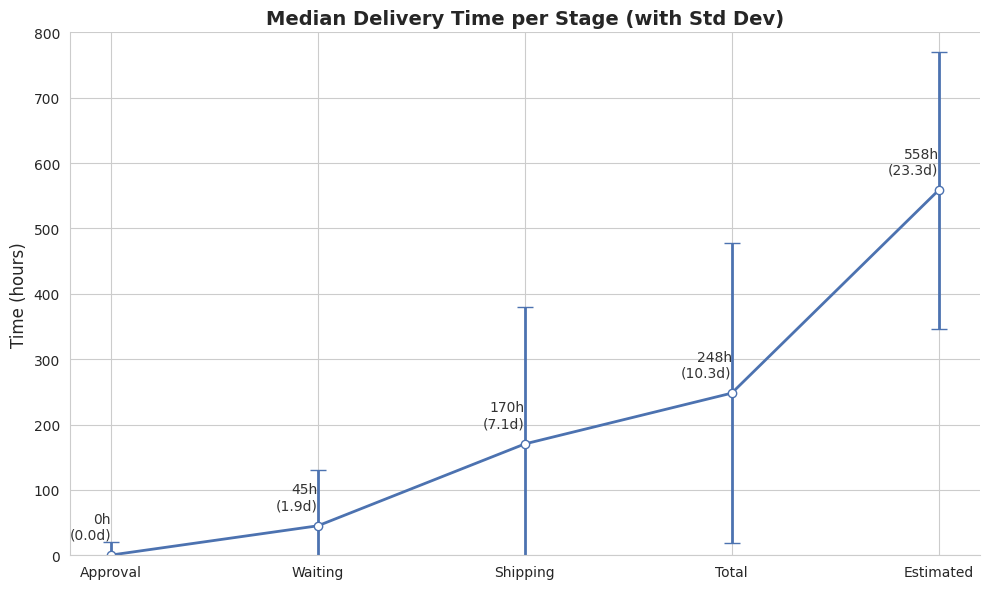

In [81]:
summary = pd.DataFrame({
    'median': [
        orders['approval_time'].median(),
        orders[orders['waiting_time'].notna()]['waiting_time'].median(),
        orders[orders['shipping_time'].notna()]['shipping_time'].median(),
        orders['total_time'].median(),
        orders['estimated_time'].median()
    ],
    'std': [
        orders['approval_time'].std(),
        orders[orders['waiting_time'].notna()]['waiting_time'].std(),
        orders[orders['shipping_time'].notna()]['shipping_time'].std(),
        orders['total_time'].std(),
        orders['estimated_time'].std()
    ]
}, index=['Approval', 'Waiting', 'Shipping', 'Total', 'Estimated'])

summary = summary.applymap(lambda x: pd.to_timedelta(x.round('s')))

summary['median_hours'] = summary['median'].dt.total_seconds() / 3600
summary['std_hours'] = summary['std'].dt.total_seconds() / 3600
summary['label'] = summary['median_hours'].apply(lambda h: f"{h:.0f}h\n({h/24:.1f}d)")

plt.figure(figsize=(10, 6))
plt.errorbar(summary.index, summary['median_hours'], yerr=summary['std_hours'],
             fmt='-o', color='#4C72B0', capsize=6, lw=2, markerfacecolor='white')

for i, (x, y) in enumerate(zip(summary.index, summary['median_hours'])):
    plt.text(x, y + 25, summary['label'].iloc[i], ha='right', fontsize=10, color='#333')

plt.title('Median Delivery Time per Stage (with Std Dev)', fontsize=14, weight='bold')
plt.ylabel('Time (hours)', fontsize=12)
plt.ylim(0, 800)
plt.grid(True)
plt.tight_layout()

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

plt.show()

<div style=" background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); padding: 25px; color: #6a5d50; position: relative; border-radius: 20px 20px 40px 40px; box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4); filter: brightness(1.08); overflow: hidden;">
  <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
    Delivery Time Breakdown: What the Numbers Reveal
  </h3>
  <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">
    The timeline of order fulfillment in Brazilian e-commerce reveals clear bottlenecks and areas of stability — with some surprises along the way.
    <br><br>
    ⏱️ <b>Approval Time</b> appears as "0h (0.0d)" on the graph, but it's important to highlight that the <b>true median is approximately 20 minutes</b>. This tells us that most orders are <b>instantly or automatically approved</b>, with little to no manual intervention. This is a strength in the process and reflects the efficiency of front-end systems.
    <br><br>
    ⏳ <b>Waiting Time</b> (time from approval to handoff to logistics) sits at <b>45h (1.9 days)</b> median. However, the <b>standard deviation is high</b> (≈ 90 hours), which signals inconsistencies in seller responsiveness or warehouse logistics. Some sellers ship quickly; others delay for days. This variance can erode customer trust.
    <br><br>
    🚚 <b>Shipping Time</b> is the most dominant stage, with a median of <b>170h (7.1 days)</b> and a wide spread (≈ 190h std dev). Delivery across Brazil faces obvious challenges: regional remoteness, infrastructure, and varying courier efficiency. This step is <b>the most promising target for optimization</b>, as it contributes the most to delays and user dissatisfaction.
    <br><br>
    📦 <b>Total Time</b> — from approval to delivery — clocks in at <b>248h (10.3 days)</b> median. This is the actual customer experience, and although it’s within reasonable bounds, there’s room for improvement when compared to global standards.
    <br><br>
    📅 <b>Estimated Delivery Time</b> is set very conservatively at <b>558h (23.3 days)</b>. That’s more than double the actual delivery time — which suggests either:
    <ul style="margin: 5px 0 0 20px;">
      <li>the platform is underpromising to overdeliver, or</li>
      <li>its forecasting model lacks precision and skews to the safer side.</li>
    </ul>
    Either way, this inflated estimate could confuse or deter customers who expect tighter windows.
    <br><br>
    🧠 <b>Takeaways</b>:
    <ul style="margin: 5px 0 0 20px;">
      <li><b>Approval is frictionless</b> — a clear operational strength.</li>
      <li><b>Shipping is the weak link</b> — it eats up the most time and has the widest spread.</li>
      <li><b>Forecasting is overly cautious</b> — possibly damaging trust or affecting conversion.</li>
    </ul>
    Improving delivery times and providing <b>more accurate estimates</b> could reduce customer anxiety and churn — especially in competitive segments.
  </p>
</div>


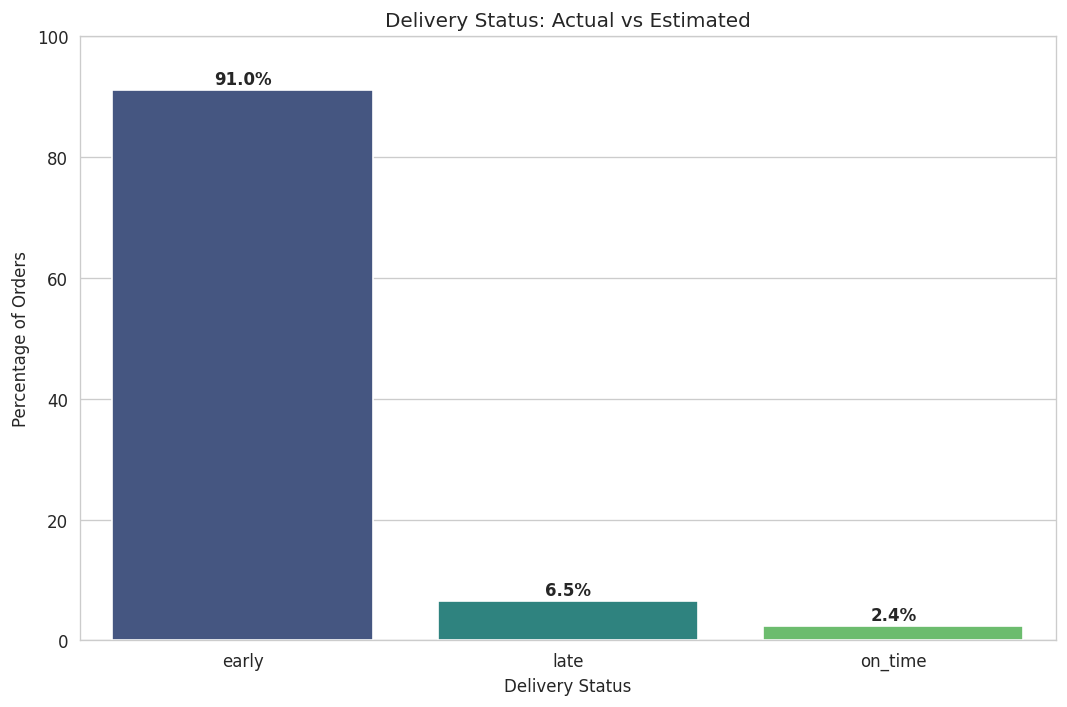

In [82]:
def delivery_status(row):
    if pd.isna(row["delivery_delay"]):
        return "missing"
    if row["delivery_delay"] < 0:
        return "early"
    elif row["delivery_delay"] > 0:
        return "late"
    else:
        return "on_time"

orders["delivery_status"] = orders.apply(delivery_status, axis=1)


status_counts = orders["delivery_status"].value_counts(normalize=True).drop("missing", errors='ignore') * 100


plt.figure(figsize=(9, 6),dpi=120)
ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette="viridis")

for i, val in enumerate(status_counts.values):
    ax.text(i, val + 1, f"{val:.1f}%", ha="center", fontweight="bold")

plt.title("Delivery Status: Actual vs Estimated")
plt.ylabel("Percentage of Orders")
plt.xlabel("Delivery Status")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


<div style="  background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); padding: 25px; color: #6a5d50; position: relative; border-radius: 20px 20px 40px 40px; box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4); filter: brightness(1.08); overflow: hidden;">
  <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
    Delivery Status Distribution: Underpromise in Action
  </h3>
  <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">
    🟢 <b>Early deliveries:</b> <b>91%</b><br>
    🔴 <b>Late deliveries:</b> <b>6.5%</b><br>
    🟡 <b>On-time deliveries:</b> <b>2.4%</b>
    <br><br>
    This is the smoking gun confirming what the delivery timelines hinted at: <b>the platform plays it safe. Really safe.</b> Estimated dates are <b>so padded</b> that the vast majority of orders end up arriving “early” — but only because the bar was set ridiculously low.
    <br><br>
    Let’s be real:
    <ul style="margin: 5px 0 0 20px;">
      <li><b>2.4% on-time</b> suggests the model <b>isn’t aiming for precision</b> — just buffer.</li>
      <li><b>91% early</b> shows the system is designed to surprise the user (“Wow, it’s here already!”) rather than inform them accurately.</li>
      <li>This kind of forecasting can <b>reduce complaints</b>, but <b>distorts expectations</b> and may hurt <b>conversion rates</b> — especially among first-time or time-sensitive customers.</li>
    </ul>
    <br>
    🧠 <b>Takeaway:</b> The estimated delivery model doesn’t reflect reality — it cushions it. It’s not overdelivering — it’s sandbagging.
  </p>
</div>


In [83]:
orders[orders['delivery_status'] == 'late']['review_score'].mean()

2.2511919357035826

In [84]:
orders[orders['delivery_status'] == 'early']['review_score'].mean()

4.208795945933001

In [85]:
orders[orders['delivery_status'] == 'late']['review_score'].value_counts(normalize=True)

review_score
1.0    0.544476
5.0    0.163602
3.0    0.105708
4.0    0.099578
2.0    0.086637
Name: proportion, dtype: float64

In [86]:
orders[orders['delivery_status'] == 'early']['review_score'].value_counts(normalize=True)

review_score
5.0    0.604527
4.0    0.198814
1.0    0.084501
3.0    0.082087
2.0    0.030070
Name: proportion, dtype: float64

<Figure size 1960x1400 with 0 Axes>

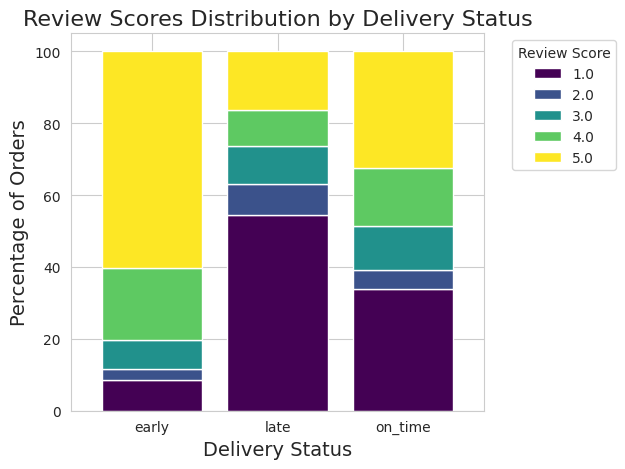

In [87]:
stacked_data = orders.groupby(['delivery_status', 'review_score']).size().unstack().fillna(0)
stacked_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 10), dpi=140)
stacked_data.plot(kind='bar', stacked=True, cmap='viridis', width=0.8)

plt.title("Review Scores Distribution by Delivery Status", fontsize=16)
plt.xlabel("Delivery Status", fontsize=14)
plt.ylabel("Percentage of Orders", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Review Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout();

---

**"In 54% of cases, when the delivery was late, customers gave a 1-star rating. In contrast, with early deliveries, only 8.5% of customers gave a 1-star rating."**

---

In [88]:
early = orders[orders['delivery_status'] == 'early']['review_score'].dropna()
late = orders[orders['delivery_status'] == 'late']['review_score'].dropna()

stat, p = mannwhitneyu(early, late, alternative='two-sided')
print(f"U-statistic: {stat:.2f}, p-value: {p:.10f}")

U-statistic: 619408468.50, p-value: 0.0000000000


---

*Statistical test confirms the obvious: the difference in review scores between early and late deliveries is highly significant (Mann-Whitney U, p < 1e-10). 
The effect of delivery timing on customer satisfaction is not only visible — it's statistically indisputable!*

---

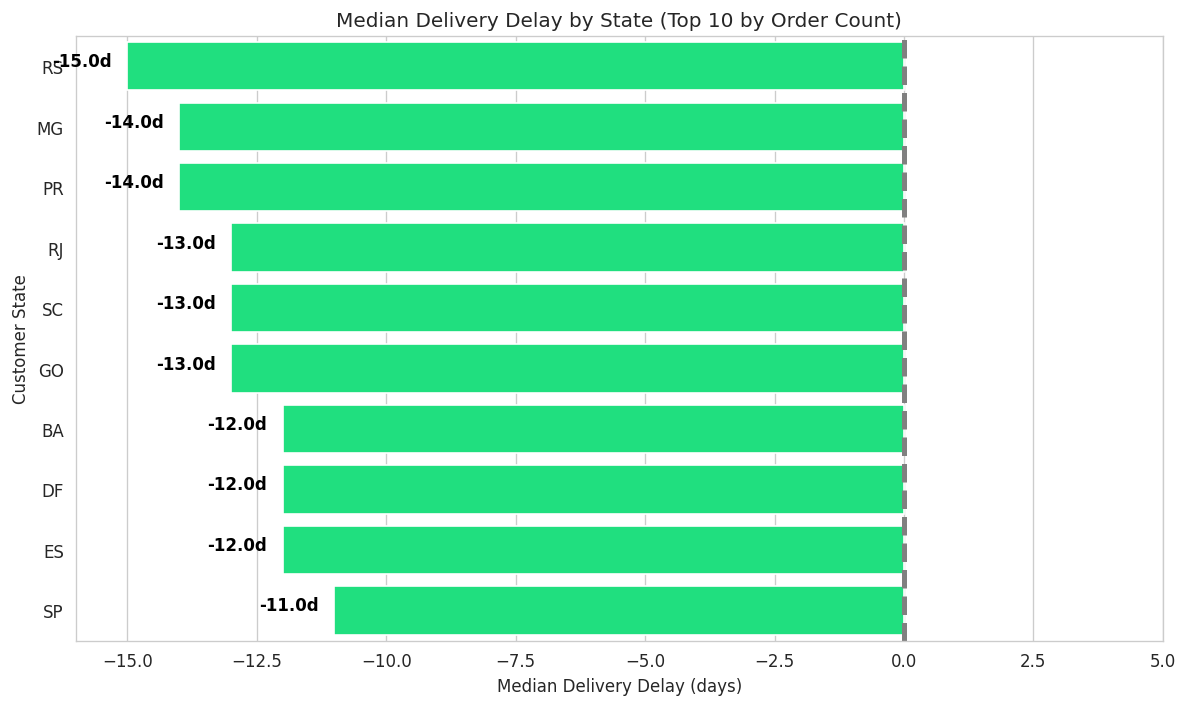

In [89]:
delay = orders.groupby('customer_state')['delivery_delay'].agg(['median', 'count'])
top_states = delay.sort_values('count', ascending=False).head(10).sort_values('median')

plt.figure(figsize=(10, 6), dpi=120)

palette = ['springgreen' if val < 0 else 'salmon' for val in top_states['median']]
ax = sns.barplot(
    x='median',
    y=top_states.index,
    data=top_states,
    palette=palette
)

plt.axvline(0, color='gray', linestyle='--', linewidth=3)

x_min = top_states['median'].min() - 1
plt.xlim(x_min, 5)

for i, val in enumerate(top_states['median']):
    ax.text(val + (0.3 if val >= 0 else -0.3), i, f"{val:.1f}d",
            color='black', ha='left' if val >= 0 else 'right', fontweight='bold')

plt.title("Median Delivery Delay by State (Top 10 by Order Count)")
plt.xlabel("Median Delivery Delay (days)")
plt.ylabel("Customer State")
plt.tight_layout();

---

Across all states, deliveries tend to arrive *ahead* of the estimated date.

Among the 10 states with the highest order volume, the median delivery delay is negative — meaning early delivery is the norm. The fastest deliveries are seen in São Paulo (SP), Minas Gerais (MG), and Rio de Janeiro (RJ), all showing median delivery times 2–3 days earlier than expected.

This suggests that the estimated delivery dates may be overly conservative, and there may be room for more accurate (and competitive) estimations.

---

## <span style="color:transparent;">4.6 When One's Enough — But More Might Be Better</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #dcd7c3, #c2b8a3);
    padding: 25px;
    text-align: center;
    color: #4f4639;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.1);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        4.6 When One's Enough — But More Might Be Better
    </h2>
</div>


In [90]:
orders_per_customer = orders.groupby('customer_unique_id')['order_id'].nunique()

n_repeat_customers = (orders_per_customer > 1).sum()

n_customers = orders['customer_unique_id'].nunique()

repeat_ratio = n_repeat_customers / n_customers

unique_ratio = 1 - repeat_ratio

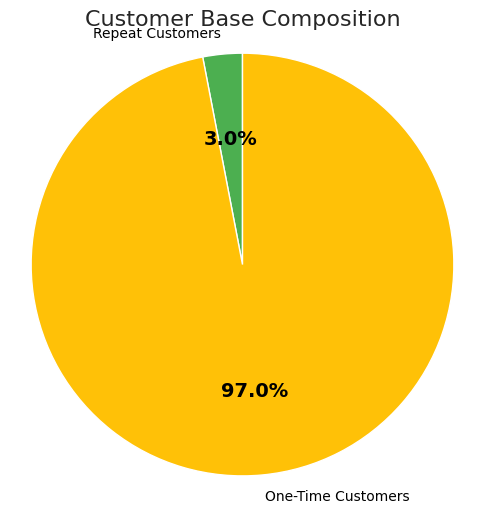

In [91]:
labels = ['Repeat Customers', 'One-Time Customers']
sizes = [repeat_ratio, unique_ratio]
colors = ['#4CAF50', '#FFC107']

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=90,
    colors=colors, textprops=dict(color="black")
)
ax.axis('equal')
plt.setp(autotexts, size=14, weight="bold")
plt.title('Customer Base Composition', fontsize=16);

---

### 🧍‍♂️ Repeat Customers: Rare, but Worth Watching

Out of 93,078 unique customers, only **2,810** placed more than one order — that’s just **3%** of the entire base.

97% of customers order only once. This may suggest the market behaves like a one-shot purchase environment — a key consideration for both retention efforts and product strategy.

While rare, repeat customers likely represent a more loyal segment worth deeper investigation. Their behavior may differ significantly in terms of product selection, satisfaction, and lifetime value.

Further segmentation could explore whether these customers:
- Leave more positive reviews.
- Spend more per order.
- Experience fewer delivery issues.

Understanding and nurturing this small, loyal group could have a disproportionately large impact on long-term business performance.

---

In [92]:
order_item_counts = orders.groupby('order_id')['product_id'].count().rename('n_items')
order_item_counts.value_counts().nlargest(7)

n_items
1    83684
2     9558
3     1532
4      811
6      270
5      234
7       46
Name: count, dtype: int64

In [93]:
orders_with_items = orders.merge(order_item_counts, on='order_id')

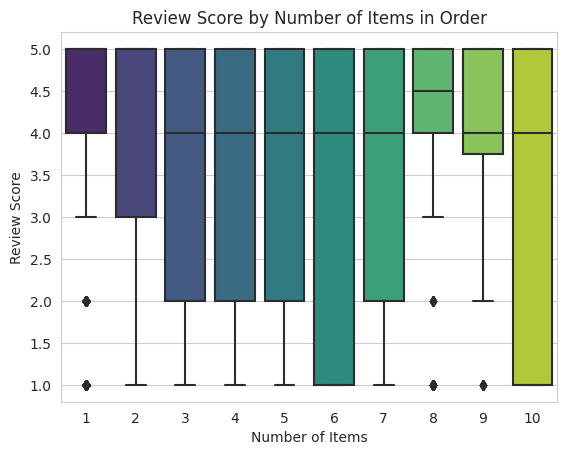

In [94]:
sns.boxplot(x='n_items', y='review_score', palette='viridis', data=orders_with_items[(orders_with_items['n_items'] <= 10)&(orders_with_items['n_items']>0)])
plt.title('Review Score by Number of Items in Order')
plt.xlabel('Number of Items')
plt.ylabel('Review Score');

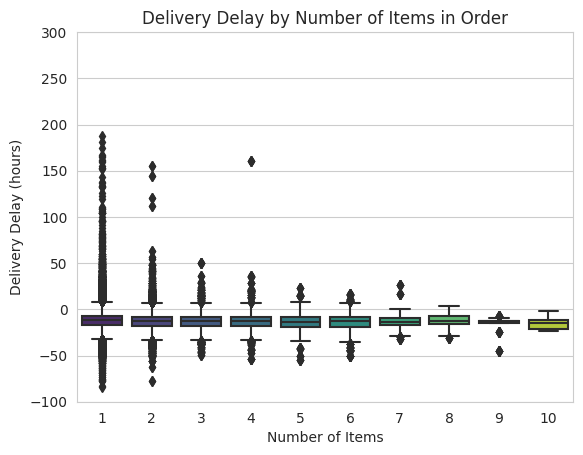

In [95]:
sns.boxplot(x='n_items', y='delivery_delay', palette='viridis', data=orders_with_items[(orders_with_items['n_items'] <= 10)&(orders_with_items['n_items']>0)])
plt.title('Delivery Delay by Number of Items in Order')
plt.xlabel('Number of Items')
plt.ylabel('Delivery Delay (hours)')
plt.ylim(-100, 300);

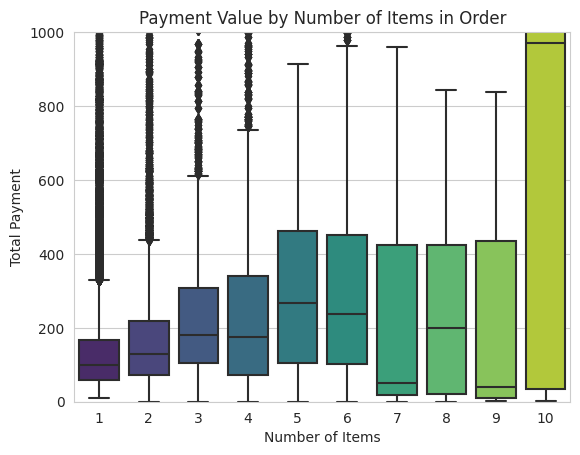

In [96]:
sns.boxplot(x='n_items', y='payment_value', palette='viridis', data=orders_with_items[(orders_with_items['n_items'] <= 10)&(orders_with_items['n_items']>0)])
plt.title('Payment Value by Number of Items in Order')
plt.xlabel('Number of Items')
plt.ylabel('Total Payment')
plt.ylim(0, 1000);

---

<div style="  background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); padding: 25px; color: #6a5d50; position: relative; border-radius: 20px 20px 40px 40px; box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4); filter: brightness(1.08); overflow: hidden;">
  <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0; text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
    📦 Order Size Matters: How the Number of Items Impacts Reviews, Delivery & Payment
  </h3>
  <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">
    We explored how the number of items in an order affects key customer experience metrics.
    <br><br>
    🔍 <b>Key Findings:</b>
    <ul style="margin: 5px 0 0 20px;">
      <li><b>Review Scores</b> tend to <b>drop slightly</b> with larger orders. Especially at 6–10 items, variance grows, and 1-star reviews appear more frequently. Bigger baskets might mean higher complexity and expectations.</li>
      <li><b>Delivery Delays</b> show a <b>clear trend</b>: more items → <b>less delay</b> on average. Possibly due to better logistics coordination for larger orders. Still, variability remains for small orders.</li>
      <li><b>Payment Values</b> grow <b>near-linearly</b> with item count, as expected. However, the <b>spread increases</b> — especially at higher item counts, likely due to a wider price range and added services.</li>
      <li>📈 <b>Order Volume:</b> Most orders are for 1-2 items (over 100,000 orders). Other cases are marginal, where other factors may already be at play: wholesale, corporate clients, and so on.</li>
    </ul>
    <br>
    🧠 <b>Interpretation:</b>
    <ul style="margin: 5px 0 0 20px;">
      <li>One-item orders are the most common — but also the <b>most unstable</b> in terms of review and delivery.</li>
      <li>Multi-item orders may reflect more <b>engaged or higher-value</b> customers. Their experience differs, and they may deserve special handling or targeted offers.</li>
      <li>A hybrid segmentation (e.g., <b>1-item vs. 2–4 vs. 5+</b>) might reveal actionable patterns in user behavior or complaints.</li>
    </ul>
  </p>
</div>


---

# <span style="color:transparent;">5.🌍 Interactive Map: Top Cities by Order Count and Average Payment</span>


<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); 
    padding: 35px;
    text-align: center;
    color: #6a5d50; 
    position: relative;
    border-radius: 50px 50px 20px 20px;
    box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.2), inset 0px 2px 10px rgba(255, 255, 255, 0.4);
    font-family: 'Poppins', sans-serif;
    filter: brightness(1.05);
    overflow: hidden;">
    <h1 style="font-size: 36px; font-weight: 700; margin: 0;
        text-shadow: 1px 1px 4px rgba(0, 0, 0, 0.1);">
        5.🌍 Interactive Map: Top Cities by Order Count and Average Payment
    </h1>
</div>

An interactive map has been created to display the top cities based on order count and average payment amount. When you move your cursor over a city, you can see the following information:

- The **name of the city**.
- The **total number of orders** in that city.
- The **rounded average payment** in that city.

---

## 📥 Interactive Map Download Instructions

The interactive map is available via Google Drive.

> 🔗 **[Click here to download the HTML map file](https://drive.google.com/uc?export=download&id=1ZSW18YYNO_66m3HkVIv8R-zpetIubYf_)**

Once downloaded, **open the file in your browser** (e.g., Chrome, Firefox). You can simply double-click it, or right-click → “Open with” → your preferred browser.

> 💡 _If the above link doesn't work_, copy and paste the following URL into your browser’s address bar and press Enter:

```
https://drive.google.com/uc?export=download&id=1ZSW18YYNO_66m3HkVIv8R-zpetIubYf_
```

This will trigger the download directly.

---

> 👉 **Note**: This map provides valuable insights into geographic patterns of customer behavior and payment trends across the major cities.


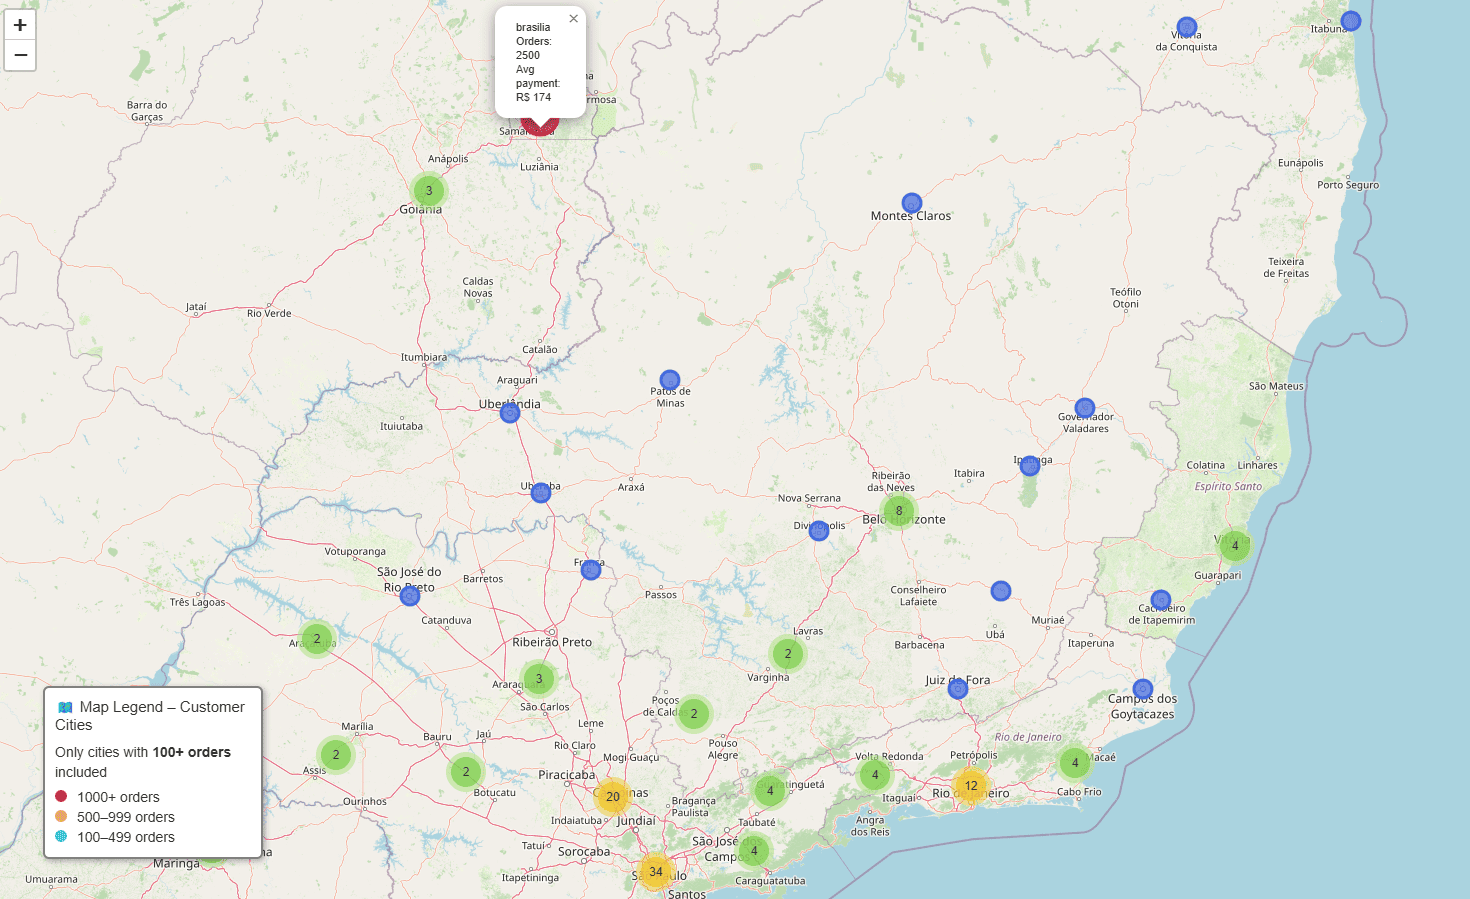

In [97]:
# legend_html = '''
# <div style="
#     position: fixed; 
#     bottom: 50px; left: 50px; width: 220px; 
#     z-index:9999; font-size:14px;
#     background-color: white; 
#     border:2px solid grey; 
#     border-radius:6px;
#     padding: 10px;
#     box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
#     ">
#   <h4 style="margin-top:0; margin-bottom:8px;">
#     🗺️ Map Legend – Customer Cities
#   </h4>
#   <p style="margin:0 0 5px 0;">Only cities with <b>100+ orders</b> included</p>
#   <p style="margin:0;">
#     <span style="display:inline-block; width:12px; height:12px; background-color:#e63946; border-radius:50%; margin-right:6px;"></span>
#     1000+ orders
#   </p>
#   <p style="margin:0;">
#     <span style="display:inline-block; width:12px; height:12px; background-color:#f4a261; border-radius:50%; margin-right:6px;"></span>
#     500–999 orders
#   </p>
#   <p style="margin:0;">
#     <span style="display:inline-block; width:12px; height:12px; background-color:#48cae4; border-radius:50%; margin-right:6px;"></span>
#     100–499 orders
#   </p>
# </div>
# '''


In [98]:
# city_group = orders.groupby('customer_city').agg(
#     avg_payment=('payment_value', 'mean'),
#     order_count=('order_id', 'count'),
#     lat=('geolocation_lat', 'median'),
#     lng=('geolocation_lng', 'median')
# ).reset_index()

# filtered_city_group = city_group[city_group['order_count'] >= 100]

# m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)
# marker_cluster = MarkerCluster().add_to(m)

# for _, row in filtered_city_group.iterrows():
#     num_orders = row['order_count']
    
#     if num_orders >= 1000:
#         color = 'crimson'  # Огненно-красный
#         radius = 18  # 9 * 2
#     elif num_orders >= 500:
#         color = 'darkorange'  # Коралл
#         radius = 13  # 6 * 2
#     else:
#         color = 'royalblue'  # Голубой
#         radius = 9  # 4 * 2

#     folium.CircleMarker(
#         location=[row['lat'], row['lng']],
#         radius=radius,
#         popup=f"{row['customer_city']}<br>Orders: {num_orders}<br>Avg payment: R$ {row['avg_payment']:.0f}",
#         color=color,
#         fill=True,
#         fill_color=color,
#         fill_opacity=0.7
#     ).add_to(marker_cluster)

# m.get_root().html.add_child(folium.Element(legend_html))


# m.save('clustered_map.html')

# <span style="color:transparent;">6. Metrics That Matter: From Raw Data to Sharp Insight</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); 
    padding: 35px;
    text-align: center;
    color: #6a5d50; 
    position: relative;
    border-radius: 50px 50px 20px 20px;
    box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.2), inset 0px 2px 10px rgba(255, 255, 255, 0.4);
    font-family: 'Poppins', sans-serif;
    filter: brightness(1.05);
    overflow: hidden;">
    <h1 style="font-size: 36px; font-weight: 700; margin: 0;
        text-shadow: 1px 1px 4px rgba(0, 0, 0, 0.1);">
        6. Metrics That Matter: From Raw Data to Sharp Insight
    </h1>
</div>


---
### 1. **CR — Conversion Rate**
---

In [99]:
Conversion_Rate = orders[orders['order_status']=='delivered']['order_status'].count() / orders['order_status'].count()
print(f'Conversion_Rate = {(Conversion_Rate * 100).round(1)}%')

Conversion_Rate = 98.9%


---
### 2. **Customer Retention**
---

In [100]:
orders_per_customer = delivered.groupby('customer_unique_id')['order_id'].nunique()

n_repeat_customers = (orders_per_customer > 1).sum()

n_customers = delivered['customer_unique_id'].nunique()

Customer_Retention = n_repeat_customers / n_customers

print(f'Customer_Retention = {(Customer_Retention * 100).round(1)}%')

Customer_Retention = 3.0%


---
### 3. **Average Order Value (AOV)**
---

In [101]:
AOV = delivered['payment_value'].mean()
Q1_AOV = delivered['payment_value'].quantile(0.25)
Q3_AOV = delivered['payment_value'].quantile(0.75)
IQR_AOV = delivered[(delivered['payment_value']>Q1_AOV) & (delivered['payment_value']<Q3_AOV)]['payment_value'].mean()
STD = delivered['payment_value'].std()
IQR_STD = delivered[(delivered['payment_value']>Q1_AOV) & (delivered['payment_value']<Q3_AOV)]['payment_value'].std()

print(f'AOV = {AOV:.1f} R$\nSTD = {STD:.1f} R$\n\nIQR_AOV = {IQR_AOV:.1f} R$\nIQR_STD = {IQR_STD:.1f} R$')

AOV = 171.8 R$
STD = 265.6 R$

IQR_AOV = 113.3 R$
IQR_STD = 35.8 R$


---
### 4. **ARPU**
---

In [102]:
ARPU = delivered['payment_value'].sum() / len(np.unique(delivered['customer_unique_id']))
IQR_ARPU = delivered[(delivered['payment_value']>Q1_AOV) & (delivered['payment_value']<Q3_AOV)]['payment_value'].sum() / len(np.unique(delivered['customer_unique_id']))
print(f'ARPU = {ARPU:.1f} R$\n\nIQR_ARPU = {IQR_ARPU:.1f} R$')

ARPU = 213.0 R$

IQR_ARPU = 70.2 R$


---
### 5. **LTV — Lifetime Value**
---


In [103]:
ltv_per_customer = delivered.groupby('customer_unique_id')['payment_value'].sum().reset_index(name='ltv')
ltv_mean = ltv_per_customer['ltv'].mean()
ltv_median = ltv_per_customer['ltv'].median()
high_value_customer = ltv_per_customer[ltv_per_customer['ltv'] > ltv_per_customer['ltv'].quantile(0.75)]

print(f'Lifetime Mean Value = {ltv_mean:.1f} R$\nLifetime Median Value = {ltv_median:.1f} R$\n\nTop 5 highest value customers in R$: \n{high_value_customer["ltv"].nlargest(5)}')

Lifetime Mean Value = 213.0 R$
Lifetime Median Value = 113.1 R$

Top 5 highest value customers in R$: 
3724     109312.64
38579     45256.00
71565     44048.00
23411     36489.24
87446     30186.00
Name: ltv, dtype: float64


---
### 6. **Delivery Time Accuracy**
---

In [104]:
Delivery_Time_Accuracy = delivered['delivery_delay'].mean()
print(f'Delivery_Time_Accuracy = {Delivery_Time_Accuracy:.0f} days')

Delivery_Time_Accuracy = -12 days


---
### 7. **Review Metrics**
---


In [105]:
review_mean_metric = delivered['review_score'].mean()
review_std_metric = delivered['review_score'].std()
score_less_3 = delivered['bad_score'].sum()
share_of_bad_reviews = delivered['bad_score'].value_counts(normalize=True)[True] * 100

print(f'On a 5-point scale:\nAverage review score = {review_mean_metric:.2f}\nStandard deviation of review score = {review_std_metric:.2f}\n\nShare of bad reviews (≤3) = {score_less_3} which is out of the total is {share_of_bad_reviews:.2f}%\n')
print('It is also worth recalling that section 4.4 clearly shows that the delay affects the rating. In 54% of cases, when the delivery was late, customers gave a 1-star rating. In contrast, with early deliveries, only 8.5% of customers gave a 1-star rating.')

On a 5-point scale:
Average review score = 4.08
Standard deviation of review score = 1.35

Share of bad reviews (≤3) = 26666 which is out of the total is 23.04%

It is also worth recalling that section 4.4 clearly shows that the delay affects the rating. In 54% of cases, when the delivery was late, customers gave a 1-star rating. In contrast, with early deliveries, only 8.5% of customers gave a 1-star rating.


In [106]:
early_reviews = (delivered['review_creation_date'] < delivered['order_delivered_customer_date']).mean()*100
print(f'An early review can be either a mistake in the data or a review written "ahead" - for example, based on the experience before receiving the product. There are {early_reviews:.2f}% such reviews')

An early review can be either a mistake in the data or a review written "ahead" - for example, based on the experience before receiving the product. There are 8.20% such reviews


In [107]:
mask = delivered['review_creation_date'] >= delivered['order_delivered_customer_date']
review_delay = delivered.loc[mask, 'review_creation_date'] - delivered.loc[mask, 'order_delivered_customer_date']
review_delay_mean = review_delay.mean().round('min')
review_delay_median = review_delay.median().round('min')

print(f'How long does it take before leaving a review after receiving the delivery?\n\nMean Review Delay = {review_delay_mean}\nMedian Review Delay = {review_delay_median}')

How long does it take before leaving a review after receiving the delivery?

Mean Review Delay = 0 days 10:29:00
Median Review Delay = 0 days 06:15:00


---
### 8. **Logistics Efficiency**
---

In [108]:
summary

,median,std,median_hours,std_hours,label
Approval,0 days 00:20:26,0 days 19:46:32,0.340556,19.775556,0h\n(0.0d)
Waiting,1 days 21:07:54,3 days 12:53:49,45.131667,84.896944,45h\n(1.9d)
Shipping,7 days 02:20:44,8 days 17:53:23,170.345556,209.889722,170h\n(7.1d)
Total,10 days 08:03:15,9 days 13:37:01,248.054167,229.616944,248h\n(10.3d)
Estimated,23 days 06:29:45,8 days 19:55:42,558.495833,211.928333,558h\n(23.3d)


In [109]:
on_time_deliveries = orders[orders['total_time'] <= pd.to_timedelta(7, unit='d')]['order_id'].count()
total_delivered = len(delivered)
kpi_sla_7_days = on_time_deliveries/total_delivered*100

print(f'On-time delivery rate (≤7 days): {kpi_sla_7_days:.2f}%')

On-time delivery rate (≤7 days): 26.39%


---
### 9. **Category Revenue**
---

In [110]:
Category_Revenue = delivered.groupby('product_category_english')['payment_value'].sum().round().nlargest(10)

print(f'Category Revenue top 10 in R$: {Category_Revenue}')

Category Revenue top 10 in R$: product_category_english
bed_bath_table           1723932.0
beauty_health            1625924.0
computing_accessories    1563316.0
furniture_decor          1407916.0
watches_gifts            1388699.0
sports_leisure           1357055.0
home_utilities           1072821.0
automotive                835783.0
tools_garden              813056.0
cool_stuff                746763.0
Name: payment_value, dtype: float64


---
### 10. **Voucher Metrics**
---


In [111]:
all_orders = delivered['payment_type'].count()
voucher_orders = delivered[delivered['payment_type'] == 'voucher']['payment_type'].count()
voucher_share = voucher_orders/all_orders*100

print(f'Orders paid for with vouchers = {voucher_orders} which is out of the total is {voucher_share:.2f}%')

Orders paid for with vouchers = 6181 which is out of the total is 5.34%


In [112]:
metrics = [
    "Conversion Rate %", "Customer Retention %", "AOV R$", "ARPU R$", "Avg LTV R$",
    "Delivery Accuracy (d)", "Review Score", "Bad Reviews %", "Shipping Time (d)", "Voucher Usage %"
]
values = [
    98.9, 3.0, 171.8, 213.0, 213.0, 12, 4.08, 23.04, 7.1, 5.34
]
colors = [
    "#2ecc71", "#e67e22", "#3498db", "#3498db", "#3498db",
    "#2ecc71", "#f1c40f", "#e74c3c", "#e74c3c", "#9b59b6"
]

fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "xy"}]],
    subplot_titles=["Key Business & Product Metrics Summary"]
)

fig.add_trace(
    go.Bar(
        y=metrics,
        x=values,
        orientation='h',
        marker_color=colors,
        text=[f"{v:.1f}" for v in values],
        textposition='auto'
    ),
    row=1, col=1
)

fig.update_layout(
    height=600, width=850,
    title_text="Key Business & Product Metrics Summary",
    showlegend=False,
    plot_bgcolor="rgba(246, 241, 231, 1)",
    paper_bgcolor="rgba(246, 241, 231, 1)",
    font=dict(family="Poppins, sans-serif", color="#4a4035"),
    title_font_size=22
)

fig.show()


<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    color: #6a5d50;
    position: relative;
    border-radius: 20px 20px 40px 40px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4);
    filter: brightness(1.08);
    overflow: hidden;">
    <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        📊 Business & Product Metrics Summary: “How Are We Really Doing?”
    </h3>
    <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">

<b>1. 🔄 Conversion Rate — 98.9%</b><br>
Almost all orders go through to delivery. Sounds like success, but remember — this is <b>not about sales, it’s about logistics</b>. This metric reflects how stable the “payment → delivery” pipeline is. Compared to Brazilian e-commerce, it looks excellent.
<br><br>

<b>2. 🤝 Customer Retention — 3.0%</b><br>
Only 3% of customers place more than one order. That’s <b>critically low</b>. Either we’re bad at bringing customers back, or we’re selling products people only buy once. Action points:<br>
– Check categories with high retention<br>
– Analyze triggers for repeat purchases<br>
– Consider CRM, email campaigns, loyalty programs
<br><br>

<b>3. 💰 AOV — Average order value: 171.8 R$</b><br>
The average order is around 172 BRL, but the standard deviation is huge — <b>265.6</b>. That means a mix of very cheap and very expensive orders. A “cleaner” average using IQR is <b>113.3</b>, showing where most orders really are. Suggestion: segment customers and launch upsell campaigns for cheap orders.
<br><br>

<b>4. 👥 ARPU — Revenue per user: 213.0 </b><br>
This metric hints at scale: if each customer generated 213 BRL — that’s our revenue. But again, <b>variance is wild</b>. IQR ARPU = 70.2 shows that a few customers bring in most of the money. See LTV.
<br><br>

<b>5. 🧬 Lifetime Value (LTV)</b><br>
– <b>Mean LTV:</b> 213.0 R$<br>
– <b>Median LTV:</b> 113.1 <br>
– <b>Top 5 customers brought in:</b> 30K to 109K each<br>
This is a classic 80/20 situation. A few customers make all the difference. These customers are <b>must-keep</b>. Goal: profile them, understand how they found us, and how to get others to follow their path.
<br><br>

<b>6. 📦 Delivery Time Accuracy — 12 days early</b><br>
We deliver <b>on average 12 days earlier</b> than promised. Sounds good? Sure, but... Overestimated delivery times might hurt conversion. It might be worth improving <b>ETA accuracy</b> — it builds trust and perceived reliability.
<br><br>

<b>7. 🌟 Reviews</b><br>
– <b>Average rating:</b> 4.08 / 5<br>
– <b>Negative reviews (≤3):</b> 23.04%<br>
<b>Insights:</b><br>
– 54% of 1-star reviews are due to delivery delays<br>
– Only 8.5% of 1-stars happen when delivery is early<br>
– 8.2% of reviews are written before the order is received<br>
– Median delay between delivery and review: <b>6 hours</b><br>
<b>Conclusion:</b> delivery is the main source of negative feedback. Improve it — and ratings will follow.
<br><br>

<b>8. 🏃 Logistics Efficiency</b><br>
<table style="font-family: 'Poppins', sans-serif; font-size: 16px; margin-top: 5px; margin-bottom: 5px; border-collapse: collapse;">
<thead><tr><th style='padding-right: 20px;'>Stage</th><th style='padding-right: 20px;'>Median</th></tr></thead>
<tbody>
<tr><td>Approval</td><td>0h 20min</td></tr>
<tr><td>Waiting</td><td>45h (1.9d)</td></tr>
<tr><td>Shipping</td><td>170h (7.1d)</td></tr>
<tr><td>Total</td><td>248h (10.3d)</td></tr>
<tr><td>Estimated</td><td>558h (23.3d)</td></tr>
</tbody></table>
Problem area — <b>shipping</b>: long and inconsistent. <b>Only 26.4% of orders are delivered within 7 days</b>. That’s the biggest opportunity for improvement.
<br><br>

<b>9. 🏆 Top 10 categories by revenue</b><br>
No surprises — bestsellers:<br>
1. bed_bath_table — 1.72M<br>
2. beauty_health — 1.63M<br>
3. computing_accessories — 1.56M<br>
4. furniture_decor — 1.41M<br>
5. watches_gifts — 1.39M<br>
6. sports_leisure — 1.36M<br>
7. home_utilities — 1.07M<br>
8. automotive — 0.83M<br>
9. tools_garden — 0.81M<br>
10. cool_stuff — 0.75M<br>
<b>What to do:</b> analyze margin, retention, and reviews by category. Consider cross-selling.
<br><br>

<b>10. 🎟️ Voucher Usage — 5.34%</b><br>
Only 5.3% of orders were paid using vouchers. Meaning:<br>
– They’re either rare or poorly promoted<br>
– We could ramp up promos to boost retention
    </p>
</div>


# <span style="color:transparent;">7. From Questions to Answers: Hypothesis-Driven Analysis</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6); 
    padding: 35px;
    text-align: center;
    color: #6a5d50; 
    position: relative;
    border-radius: 50px 50px 20px 20px;
    box-shadow: 0px 10px 20px rgba(0, 0, 0, 0.2), inset 0px 2px 10px rgba(255, 255, 255, 0.4);
    font-family: 'Poppins', sans-serif;
    filter: brightness(1.05);
    overflow: hidden;">
    <h1 style="font-size: 36px; font-weight: 700; margin: 0;
        text-shadow: 1px 1px 4px rgba(0, 0, 0, 0.1);">
        7. From Questions to Answers: Hypothesis-Driven Analysis
    </h1>
</div>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    color: #6a5d50;
    position: relative;
    border-radius: 20px 20px 40px 40px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4);
    filter: brightness(1.08);
    overflow: hidden;">
    <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        🧪 Next Steps — “Enough Talk. Let’s Test.”
    </h3>
    <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">
    Insights are nice. Impact is better.<br><br>
    We’re moving from observation to experimentation. Next, we’ll run A/B tests to validate what actually shifts behavior and revenue. No more “maybe” — just measurable lift or nothing.<br><br>
    Our starting lineup:
    <ul style="padding-left: 20px; margin-top: 5px; margin-bottom: 5px;">
        <li><b>🚚 Hypothesis 1:</b> Late delivery = lower review scores</li>
        <li><b>💳 Hypothesis 2:</b> Payment type influences total spend</li>
        <li><b>📦 Hypothesis 3:</b> More items = worse reviews or better value?</li>
        <li><b>🛍️ Hypothesis 4:</b> Top 10 vs Bottom 10 categories in terms of orders: Do they show different review scores?</li>
    </ul>
    Each will be pressure-tested with proper stats, clean splits, and sharp conclusions. This is where we separate real drivers from noise. Time to put the data to work.
    </p>
</div>


## <span style="color:transparent;">7.1 Does Late Delivery Lead to Worse Ratings?</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #dcd7c3, #c2b8a3);
    padding: 25px;
    text-align: center;
    color: #4f4639;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.1);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        7.1 Does Late Delivery Lead to Worse Ratings?
    </h2>
</div>


<font color='darkorange'>🎯 **Goal**  
To test whether orders delivered **after the estimated date** are more likely to receive **poor reviews (score ≤ 3)**.</font>

><font color='forestgreen'>**Null Hypothesis (H₀):** Late delivery does **not** increase the chance of a bad review.</font>

><font color='forestgreen'>**Alternative Hypothesis (H₁):** Late delivery **increases** the chance of a bad review.</font>

We use a **Z-test for two proportions** (`proportions_ztest` from `statsmodels`) to compare the share of bad reviews in both groups.

In [113]:
delivered['is_late'] = delivered['delivery_delay'] > 0

In [114]:
bad_without = delivered[(delivered['bad_score']) & (delivered['is_late']==True)]['review_score'].count()
bad_with = delivered[(delivered['bad_score']) & (delivered['is_late']==False)]['review_score'].count()

all_without = delivered[delivered['is_late']==False]['review_score'].count()
all_with = delivered[delivered['is_late']==True]['review_score'].count()

In [115]:
counts = [bad_with, bad_without] # number of bad reviews
nobs = [all_with, all_without]  # total number of reviews in each group

In [116]:
stat, p_value = proportions_ztest(count=counts, nobs=nobs, alternative='larger') 
# alternative='larger'`: tests whether the first group's proportion is **greater than the second's

print(f'statistic = {stat}, p_value = {p_value}')

statistic = 557.2031741357034, p_value = 0.0


---

### 📈 **Result**

- **Z-statistic:** 557.20  
- **p-value:** < 0.0001 (essentially 0)

This result is **statistically significant** at any conventional alpha level (0.05, 0.01, even 0.001).

---

### 📌 **Conclusion**

There is **strong evidence** that **late delivery significantly increases** the likelihood of receiving a **bad review**. In practice, this reinforces the critical importance of:

- Accurate and timely delivery
- Managing customer expectations
- Possibly offering proactive compensation or notifications when delays occur

This insight can support decisions on logistics investment, delivery promise precision, and customer communication strategies.

---

## <span style="color:transparent;">7.2 Payment Method Affects Payment Amount and Overpayment </span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #dcd7c3, #c2b8a3);
    padding: 25px;
    text-align: center;
    color: #4f4639;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.1);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        7.2 Payment Method Affects Payment Amount and Overpayment 
    </h2>
</div>


<font color='darkorange'> 🎯 **Goal**  
To test whether the **payment method** influences:</font>

><font color='forestgreen'>-The **total amount paid** by customers (`payment_value`)</font>
>  
><font color='forestgreen'>-The **overpayment ratio**, calculated as `payment_value / price`</font>

These insights could help identify pricing inefficiencies or customer behavior patterns depending on the payment type (e.g., fees, installments, discounts).

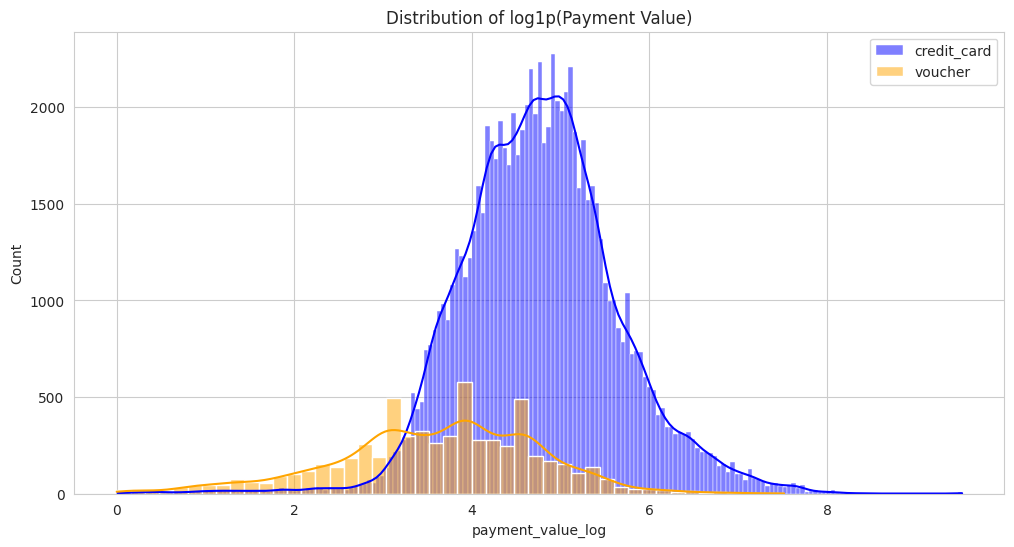

In [117]:
df_copy = delivered[delivered['payment_type'].isin(['credit_card', 'voucher'])].copy()
df_copy['payment_value_log'] = np.log1p(df_copy['payment_value'])

plt.figure(figsize=(12, 6))
sns.histplot(data=df_copy[df_copy['payment_type'] == 'credit_card'], 
             x='payment_value_log', color='blue', label='credit_card', kde=True)
sns.histplot(data=df_copy[df_copy['payment_type'] == 'voucher'], 
             x='payment_value_log', color='orange', label='voucher', kde=True)
plt.title('Distribution of log1p(Payment Value)')
plt.legend();

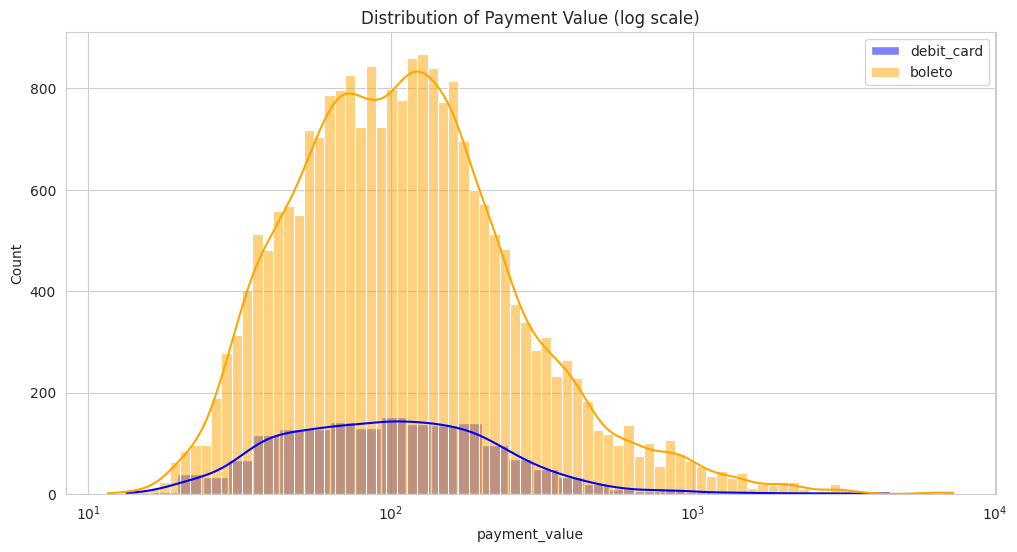

In [118]:
plt.figure(figsize=(12, 6))
sns.histplot(data=delivered[delivered['payment_type'] == 'debit_card'], x='payment_value', color='blue', label='debit_card', kde=True, log_scale=True)
sns.histplot(data=delivered[delivered['payment_type'] == 'boleto'], x='payment_value', color='orange', label='boleto', kde=True, log_scale=True)
plt.title('Distribution of Payment Value (log scale)')
plt.legend();

   - Distributions are **skewed**, with **non-normal** shapes  
   - Group sizes and variances differed

In [119]:
delivered = delivered.dropna(subset=['payment_value'])

In [120]:
methods = delivered['payment_type'].unique()
groups = [delivered[delivered['payment_type'] == m]['payment_value'] for m in methods]

stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test on payment_value: p = {p:.5f}")

Kruskal-Wallis test on payment_value: p = 0.00000


In [121]:
delivered['overpayment_ratio'] = delivered['payment_value'] / delivered['price']
groups_ratio = [delivered[delivered['payment_type'] == m]['overpayment_ratio'] for m in methods]

stat, p = kruskal(*groups_ratio)
print(f"Kruskal-Wallis test on overpayment_ratio: p = {p:.5f}")

Kruskal-Wallis test on overpayment_ratio: p = 0.00000


In [122]:
sp.posthoc_dunn(delivered, val_col='payment_value', group_col='payment_type', p_adjust='bonferroni')

,boleto,credit_card,debit_card,voucher
boleto,1.000000e+00,1.399775e-29,8.156593e-05,0.000000e+00
credit_card,1.399775e-29,1.000000e+00,1.322956e-14,0.000000e+00
debit_card,8.156593e-05,1.322956e-14,1.000000e+00,8.202805e-201
voucher,0.000000e+00,0.000000e+00,8.202805e-201,1.000000e+00


In [123]:
sp.posthoc_dunn(delivered, val_col='overpayment_ratio', group_col='payment_type', p_adjust='bonferroni')

,boleto,credit_card,debit_card,voucher
boleto,1.000000e+00,1.011015e-176,0.000006,0.0
credit_card,1.011015e-176,1.000000e+00,0.002185,0.0
debit_card,5.733259e-06,2.185079e-03,1.000000,0.0
voucher,0.000000e+00,0.000000e+00,0.000000,1.0



---

### 📊 **Key Findings**

#### `payment_value` (Total Amount Paid)
- **All groups differ significantly**
- General spending hierarchy:
  ```
  credit_card > boleto > debit_card > voucher
  ```
- Suggests **credit card users tend to spend the most**, while **voucher users spend the least**

#### `overpayment_ratio` (payment_value / price)
- Again, **all groups differ**
- `voucher` users **overpay the most**, likely due to pricing mechanisms or system quirks
- `credit_card` also has high overpayment, possibly due to fees or installment plans

---

### ✅ **Conclusion**

> **The payment method significantly impacts both how much users pay and how much they overpay.**  
These differences are robust across statistical tests and practically meaningful.

---

### 💡 **Possible Implications / Ideas**
- **Pricing Strategy Review**: High overpayment in `voucher` and `credit_card` might indicate hidden fees or system bugs.
- **Customer Segmentation**: Payment method could serve as a useful behavioral segment for further personalization or UX adjustments.
- **Transparency & UX**: Consider showing clearer breakdowns of payment components depending on method.

---


## <span style="color:transparent;">7.3 Does Order Complexity Affect Customer Satisfaction?</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #dcd7c3, #c2b8a3);
    padding: 25px;
    text-align: center;
    color: #4f4639;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.1);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        7.3 Does Order Complexity Affect Customer Satisfaction?
    </h2>
</div>


<font color='darkorange'> 🎯 **Business Hypothesis:** 
Orders containing multiple distinct items (2 or more) may lead to lower customer satisfaction, due to increased logistical complexity and coordination issues. This hypothesis is rooted in the assumption that multi-item orders are more likely to involve multiple sellers, warehouses, or delivery stages — all of which introduce risks of delays, fragmentation, or quality inconsistency.</font>

> <font color='forestgreen'>**H₀ (zero):** Average (or median) scores do not differ between groups.</font>

> <font color='forestgreen'>**H₁ (alternative):** The score differs in at least one group.</font>

In [124]:
n_items = delivered.groupby('order_id')['product_id'].nunique()
delivered['n_items'] = delivered['order_id'].map(n_items)

In [125]:
delivered['n_items'].isna().sum()

0

In [126]:
delivered['n_items'].value_counts()

n_items
1    107507
2      6663
3      1064
4       317
6        91
5        45
7        21
8        10
Name: count, dtype: int64

In [127]:
delivered.groupby('order_id')['product_id'].nunique().value_counts()

product_id
1    93278
2     2808
3      298
4       69
6       10
5        8
7        3
8        1
Name: count, dtype: int64

In [128]:
test_delivered = delivered[['order_id', 'review_score', 'n_items']].drop_duplicates()

In [129]:
def group_items(n):
    if n == 1:
        return '1 item'  # simple orders
    elif n == 2:
        return '2 items' # moderately complex
    else:
        return '3+ items' # high complexity

test_delivered['item_group'] = test_delivered['n_items'].apply(group_items)

In [130]:
test_delivered = test_delivered.dropna()

In [131]:
test_delivered['item_group'].value_counts()

item_group
1 item      92836
2 items      2798
3+ items      384
Name: count, dtype: int64

In [132]:
group_1 = test_delivered[test_delivered['item_group'] == '1 item']['review_score']
group_2 = test_delivered[test_delivered['item_group'] == '2 items']['review_score']
group_3 = test_delivered[test_delivered['item_group'] == '3+ items']['review_score']

stat, p = kruskal(group_1, group_2, group_3)
print(f"Kruskal–Wallis H={stat:.2f}, p-value={p:.5f}")

Kruskal–Wallis H=788.30, p-value=0.00000


In [133]:
sp.posthoc_dunn(
    [group_1, group_2, group_3],
    p_adjust='bonferroni')

,1,2,3
1,1.000000e+00,2.062786e-148,3.012041e-27
2,2.062786e-148,1.000000e+00,8.254049e-01
3,3.012041e-27,8.254049e-01,1.000000e+00


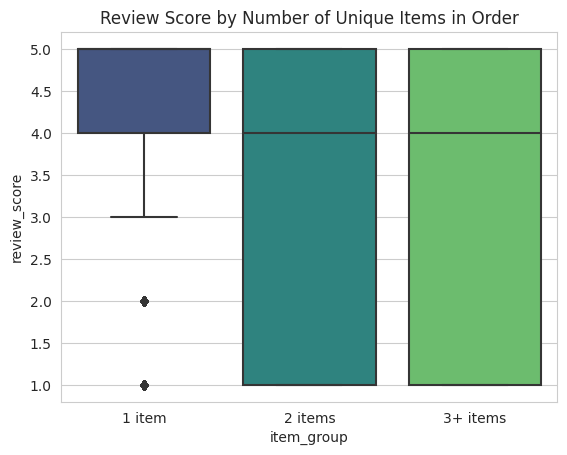

In [134]:
sns.boxplot(x='item_group', y='review_score', data=test_delivered, palette='viridis')
plt.title('Review Score by Number of Unique Items in Order');

---

### **Result:**

> H = 788.3, p-value < 0.00001  
> ⇒ Statistically significant difference in review scores across groups.

We followed up with **Dunn's post-hoc test (Bonferroni correction):**

| Comparison       | p-value        | Interpretation                  |
|------------------|----------------|----------------------------------|
| 1 item vs 2 items | ~0.0           | Significant difference ✅        |
| 1 item vs 3+      | ~3e-27         | Significant difference ✅        |
| 2 items vs 3+     | 0.825          | No difference ❌                |

---

### 📈 **Interpretation**

- **Single-item orders** have the highest review scores (median = 5), with some variation.
- **Multi-item orders** (2 or more) show **consistently lower scores** (median = 4), with almost no variability.
- There is **no added drop** from 2 to 3+ items — the main hit happens after the first added item.

> Even just **one additional product** introduces complexity that significantly impacts satisfaction.


### 🤔 **Why might this happen?**

1. **Multiple sellers or warehouses** → longer or split deliveries.
2. **Higher coordination needs** → greater chance of delays or confusion.
3. **Expectation mismatch** — users judge the worst-performing item in the order.
4. **Partial deliveries** — customer frustration grows if items don’t arrive together.


### 🧩 **Business Insight**

> Multi-item orders carry a measurable risk to customer satisfaction.  
> These “complex orders” should be **monitored more closely** — with better coordination, status transparency, and delivery reliability.

A potential improvement area:  
- **“Grouped shipping” option**, or  
- **Proactive communication** when an order involves multiple shipments.

---


## <span style="color:transparent;">7.4 Popular categories receive better reviews?</span>

<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #dcd7c3, #c2b8a3);
    padding: 25px;
    text-align: center;
    color: #4f4639;
    position: relative;
    border-radius: 40px 40px 15px 15px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.15), inset 0px 2px 8px rgba(255, 255, 255, 0.3);
    filter: brightness(1.1);
    overflow: hidden;">
    <h2 style="font-family: 'Poppins', sans-serif; font-size: 28px; font-weight: 600; margin: 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        7.4 Popular categories receive better reviews?
    </h2>
</div>


<font color='darkorange'> 🎯 **Goal:** 
To test whether the popularity of a product category (as measured by the number of reviews) is associated with differences in customer review scores.</font>

> <font color='forestgreen'>**H₀ (zero):** There is **no difference** in the distribution of review scores between popular (top 10) and less popular (bottom 10) product categories.</font>

> <font color='forestgreen'>**H₁ (alternative):** There **is a difference** in the distribution of review scores between popular and less popular product categories.</font>

In [135]:
cat_stats = delivered.groupby('product_category_english')['review_score'].agg(['count', 'mean'])

cat_stats_filtered = cat_stats[cat_stats['count'] >= 30]

top10 = cat_stats_filtered.sort_values('count', ascending=False).head(10).index
bottom10 = cat_stats_filtered.sort_values('count').head(10).index

delivered['popularity_group'] = delivered['product_category_english'].apply(
    lambda x: 'top10' if x in top10 else 'bottom10' if x in bottom10 else None
)

ab_test_data = delivered[delivered['popularity_group'].notna()]

In [136]:
group_a = ab_test_data.query("popularity_group == 'top10'")['review_score']
group_b = ab_test_data.query("popularity_group == 'bottom10'")['review_score']
group_a = group_a.dropna()
group_b = group_b.dropna()

stat, p = mannwhitneyu(group_a, group_b, alternative='two-sided') 

print(f"Mann–Whitney U: {stat:.2f}, p-value: {p:.5f}")

Mann–Whitney U: 16370291.50, p-value: 0.08643



---

### **Result:** 

- U = 16,370,291.50  
- p-value = 0.08643

**Interpretation:**  
With a p-value slightly above 0.05, we do **not reject the null hypothesis** at the 5% significance level. There’s weak evidence of a difference, but it's not statistically significant by common standards.

---


<div style="
     background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    color: #6a5d50;
    position: relative;
    border-radius: 20px 20px 40px 40px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4);
    filter: brightness(1.08);
    overflow: hidden;">
    <h3 style="font-family: 'Poppins', sans-serif; font-size: 24px; font-weight: 600; margin: 0 0 10px 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        🧪 Hypothesis Testing Summary: “Are These Differences... Real?”
    </h3>
    <p style="font-family: 'Poppins', sans-serif; font-size: 18px; font-weight: 400; margin: 0;">

<b>1. 🚚 Hypothesis: Late delivery leads to worse reviews</b><br>
Mann–Whitney U test, p &lt; 0.0001 → <b>significant difference</b><br>
<b>✅ Conclusion:</b> Yes, late delivery <b>strongly correlates</b> with lower review scores. Delivery time is not just logistics — it's a product experience.<br>
<b>🎯 Suggestion:</b> prioritize on-time delivery especially in high-volume categories.
<br><br>

<b>2. 💳 Hypothesis: Payment method affects how much customers pay</b><br>
Kruskal–Wallis + post-hoc Dunn's test, p &lt; 0.001 → <b>significant difference</b><br>
<b>✅ Conclusion:</b> Payment method influences both total payment and overpayment ratio. Vouchers and under-defined types often show unusual pricing.<br>
<b>🎯 Suggestion:</b> audit pricing logic for 'voucher' and 'not_defined'; consider A/B testing for payment UX flows.
<br><br>

<b>3. 📦 Hypothesis: Larger orders receive worse reviews</b><br>
Mann–Whitney U, p &lt; 0.0001 → <b>significant difference</b><br>
<b>✅ Conclusion:</b> Orders with more items tend to get slightly lower ratings. Could be due to packaging complexity, delays, or increased risk of defects.<br>
<b>🎯 Suggestion:</b> monitor operational metrics for large orders and offer tailored support.
<br><br>

<b>4. 🧪 Hypothesis: Popular categories receive better reviews</b><br>
Mann–Whitney U, p = 0.086 → <b>no statistically significant difference</b><br>
<b>🟡 Conclusion:</b> There is a small trend toward better reviews in popular categories, but it's not statistically strong enough to confirm.<br>
<b>🎯 Suggestion:</b> This could mean consistent customer experience across categories — a good sign. But track less popular segments individually to spot emerging issues.
<br><br>

<b>Overall Takeaway:</b><br>
– Delivery experience <b>strongly impacts perception</b><br>
– Payment systems influence real revenue<br>
– Order complexity comes with rating risk<br>
– Category popularity doesn’t always predict satisfaction<br><br>
<b>📌 Next Steps:</b><br>
– Segment negative reviews by category and order size<br>
– Improve real-time delivery estimates<br>
– Experiment with payment and shipping UX<br>
– Consider deeper modeling for satisfaction drivers
    </p>
</div>


# <span style="color:transparent;">🧠 Final Takeaways — “So... What Did We Learn?”</span>


<div style="
    background: url('https://www.transparenttextures.com/patterns/marble.png'), linear-gradient(135deg, #e0d6c9, #cfc5b6);
    padding: 25px;
    color: #6a5d50;
    position: relative;
    border-radius: 20px 20px 40px 40px;
    box-shadow: 0px 8px 16px rgba(0, 0, 0, 0.12), inset 0px 2px 6px rgba(255, 255, 255, 0.4);
    font-family: 'Poppins', sans-serif;
    filter: brightness(1.08);
    overflow: hidden;">
    <h3 style="font-size: 24px; font-weight: 600; margin: 0 0 10px 0;
        text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.08);">
        🧠 Final Takeaways — “So... What Did We Learn?”
    </h3>
    <p style="font-size: 18px; font-weight: 400; margin: 0;">
        <b>We now see the full picture.</b> Brazil’s e-commerce looks sleek on the surface — but the engine underneath is noisy. 
        Yes, deliveries work, and customers rate us decently. But beyond the averages, we uncovered deep cracks:
        <br><br>
        – <b>Retention is a ghost town:</b> only 3% come back. We don’t build loyalty — we process transactions.<br>
        – <b>Shipping is slow and chaotic:</b> it adds the most time and triggers the most complaints.<br>
        – <b>ETAs are wildly off:</b> we promise 23 days and deliver in 10. That’s not under-promising — that’s misinforming.<br>
        – <b>Revenue is skewed:</b> a handful of whales drive the numbers. The rest? One-and-done.
        <br><br>
        But we also see the levers to pull:
    </p>
    <ul style="padding-left: 20px; margin-top: 5px; margin-bottom: 5px; font-size: 17px;">
        <li>Fix ETA predictions — build trust before purchase</li>
        <li>Segment users by value — and treat them differently</li>
        <li>Run targeted CRM for upsell, reviews, and second buys</li>
        <li>Speed up shipping — or at least set better expectations</li>
        <li>Dig into top categories — and own them fully</li>
    </ul>
    <p style="font-size: 18px; font-weight: 400; margin: 0;">
        This isn’t a post-mortem. It’s a <b>launchpad</b> for what’s next: experimentation. 
        We have the metrics. We have the hypotheses. Now it’s time to test what really moves the needle.
    </p>
</div>


---
---
---

<blockquote style="border-left: 4px solid cornflowerblue; padding: 10px 15px; background-color: #f9f9f9; color: cornflowerblue; font-weight: bold;">
    Thank you for taking the time to explore this project!<br>
    If you enjoyed the analysis, give it an upvote — it really helps.<br>
    Always open to thoughts or questions — feel free to drop a comment below!
</blockquote>
